## Titanic with the Confusion-Dots plot
(https://www.kaggle.com/dan3dewey/titanic-confusion-dots-plot)

Try some of the SciKit classifier models on the Titanic data.<br>
Demonstrate the **Confusion Dots plot** which is essentially a visual confusion matrix;<br>
the confusion-dots routine, `y_yhat_plots()`, was taken from the file chirp_roc_lib.py in the github repo at:<br> 
https://github.com/dan3dewey/chirp-to-ROC

## <a id="Index">Index</a>
Diary<br>
<a href="#DataProcessing">Reading and Processing csv Data Files</a><br>
<a href="#NameFeats">Features from Name</a><br>
<a href="#FeatureSummary">Summary of the Features</a><br>
<br>
<a href="#MachineLearning">Machine Learning</a><br>
<a href="#SetupData">Select Features and get X,y Data</a><br>
<br>
<a href="#DefineModels">Define the Models and Parameters</a><br>
<br>
<a href="#HyperSearch">Do the Hyper-Parameter Search</a><br>
<a href="#CVResults">Grid Search CV Results</a><br>
<br>
<a href="#FeatureImportance">Feature Importance</a><br>
<a href="#EvaluateBest">Evaluate Best Model</a><br>
<b><a href="#ConfusionDots">Confusion Dots and ROC plots</a></b><br>
<br>
<a href="#OutputKaggle">Output Kaggle Predictions</a><br>
<a href="#TheEnd">The End</a><br>
<br>

## Diary
(v1) LB=0.7655 Training=0.7867  Using the gender_submission file.<br>
(v2) LB=0.7608 Training=0.7935  Using Logistic Regression. <br>
(v3) LB=0.7703 Training=0.8002  LGR without Age and Fare. <br>
Create 'one hot' versions of Sex: Sex_M and Sex_F (LR uses similar coef.s anyway); create a Fare_0 flag and set a Pclass-based nominal Fare for these; include Fare_log back in fit. LR C=10 is over-fit direction, C=0.1 underfit.<br>
(v4) LB=0.7512 Training=0.7901  LGR: with Fare_0, Fare_log, Sex_M/F, no Age, C=1.0. <br>
(v5) LB=0.7608 Training=0.7935  LGR: with Fare_0, Fare_log, Sex_M/F, no Age, change to C=0.1. <br>
Add Age_log and Age_young, Age_old...<br>
(v6) LB=0.7703 Training=0.8080  LGR: with Age_log,young,old, Fare_0, Fare_log, Sex_M/F; C=0.07 . <br>
Adjust the ReLU levels for Age_young,old and add one-hot values of Embarked. Kind of the end for Logistic Regression, try different C values (in C order):<br>
(v11) LB=0.7608 Training=0.8148  LGR: with Age_log,young,old, Fare_0,log, Sex_M/F, Embark_C,Q,S; C=2.0 .<br>
(v7) LB=0.7608 Training=0.8137  LGR: with Age_log,young,old, Fare_0,log, Sex_M/F, Embark_C,Q,S; C=0.30 .<br>
(v8) LB=0.7655 Training=0.8126  LGR: with Age_log,young,old, Fare_0,log, Sex_M/F, Embark_C,Q,S; C=0.07 .<br>
(v9) LB=0.7655 Training=0.8159  LGR: with Age_log,young,old, Fare_0,log, Sex_M/F, Embark_C,Q,S; C=0.02 .<br>
(v10) LB=0.7368 Training=0.7867  LGR: with Age_log,young,old, Fare_0,log, Sex_M/F, Embark_C,Q,S; C=0.010 .<br>
Add in the Decision Tree Classifier and try some parameters for it:<br>
(v12) LB=0.7655 Training=0.8373  **DTC**: with max_depth 5, min_samples_leaf 10, min_impurity_decrease 0.001.<br>
Now with many hyper parameters, need to do Grid Search CV'ing to find the best hyper-parameters for the chosen model...<br>
Borrow GSCV code from [my simple PetFinder kernel](https://www.kaggle.com/dan3dewey/simple-scikit-models-and-stacking)
 . <br>
Find best Logistic Regression C parameter:<br>
(v13) LB=0.7608 Training=0.8204, max-CV=0.8138(10-fold)  **LRG**: use 10 folds and find C ~ 0.04 gives best CV. <br>
Find the best Random Forest Classifier parameters: <br>
(v14) LB=0.7799 Training=0.8272,8383,8462, 75%-CV=0.8208,8230,8191(10-fold)  **RFC**: use 10 folds; depth=5, min_samp=2 seems best. <br>
18 Apr 2019: Scale X (and Xkag) so that the X features have mean=0, std=1 (shouldn't affect the previous results, doing it toward trying SVC and MLP.) Replace Pclass with Pclass_1,2,3; limit Parch and SibSp to a max of 3. Make lists of FPs and FNs. v15A.<br>
Include and find good parameters for the Gradient Boosting Classifier:<br>
(v15) LB=0.7560 Training ~ 0.910, 75%-CV ~ 0.830(10-fold)  **GBC**: params 0.003-5-10-0.80 <br>
(v16) LB=0.7847 Training ~ 0.847, 75%-CV ~ 0.820(10-fold)  **RFC**: params 5-0.001-2 <br>
Reduce max_depth to 4 for the GBC and use larger min values:<br>
(v17) LB=0.7895 Training ~ 0.844, 75%-CV ~ 0.826(10-fold)  **GBC**: max_depth=4, 0.003-20-85-0.80 <br>
19 Apr 2019: Remove the Fare_log feature from v17: Train reduced a bit, but GSCV Test and Train are closer: <br>
(v18) LB=0.7895 Training ~ 0.841, 75%-CV ~ 0.830(10-fold)  **GBC**: No Fare, max_depth=4, 0.003-20-85-0.80 <br>
Use the average of the (k-1)/k split fit predictions:<br>
(v19) LB=0.7847 Training ~ 0.845, 75%-CV ~ 0.826(10-fold)  **GBC**: Split-ave, No Fare, depth=4, 0.003-20-85-0.80 <br>
Put the Fare_log back:<br>
(v20) LB=0.7895 Training ~ 0.855, 75%-CV ~ 0.826(10-fold)  **GBC**: Split-ave, w/Fare_log, depth=4, 0.003-20-85-0.80 <br>
Try SVC models too<br>
(v21) LB=0.7703 Training ~ 0.840, 75%-CV ~ 0.831(10-fold) **SVC**: Split-ave, w/Fare_log, poly(3),2.5, 0.030<br>
(v22) LB=0.7655 Training ~ 0.826, 75%-CV ~ 0.813(10-fold) **SVC**: Split-ave, w/Fare_log, rbf,  C=3.5, 0.025<br>
And try MLP models...<br>
(v23) LB=0.7560 Training ~ 0.836, 75%-CV ~ 0.821(10-fold) **MLP**: no Fare, (14,10,8) alpha,rate,momen.: 0.60-0.09-0.50 <br>
OK, roll the dice one more time...<br>
(v24) LB=0.7799 Training ~ 0.843, 75%-CV ~ 0.826(10-fold)  **GBC**: No Fare, max_depth=4, 0.003-20-85-0.80 <br>
(v25) LB=0.7799 Training ~ 0.848, 75%-CV ~ 0.829(10-fold)  **GBC**: No Fare, max_depth=**5**, 0.003-20-85-0.80 <br>
OK, only thing left to do is to see if the Name field can provide any useful 'signal'... Put that on back burner ;-) <br>
(v26) LB=0.7799 Training ~ 0.86.5, 75%-CV ~ 0.83.2(10-fold)  **GBC**: with Fare, max_depth=**5**, 0.003-20-85-0.80 <br>
Try to re-do v20:<br>
(v27) LB=0.7847 Training ~ 0.862, 75%-CV ~ 0.829(10-fold)  **GBC**: Split-ave, w/Fare_log, depth=4, 0.003-20-85-0.80 <br>
21 Apr 2019: Added "violin plots" for survival vs Age (or Fare_log) and Pclass; changed the NaN age from median to random in range 18 to 40 and/but set a "NoAge" flag for these - very low feature importance.<br>
See if I can get something out of the Name field: Mr Master Mrs or Miss ?<br>
Added one-hot features: Sex_Mr,Mrs,Miss,Master; redo v27 with these in place of Sex_M,F:<br>
(v28) **LB=0.7942** Training ~ 0.864, 75%-CV ~ 0.829(10-fold)  **GBC**: Split-ave, w/Fare_log, depth=4, 0.003-20-85-0.80 <br>
See how the MLP is doing:<br>
(v29) LB=0.7703 Training ~ 0.848, 75%-CV ~ 0.827(10-fold)  **MLP**: Split-ave, w/Fare_log, (14,10,8) alpha,rate,momen.: 0.60-0.09-0.50 <br>
24 Apr 2019: Add/use two simple LastName-based features: the number of characters and the fraction of vowels in the last name...<br>
(v30) LB=0.7895 Training ~ 0.861, 75%-CV ~ 0.829(10-fold)  **GBC**: Split-ave, w/Fare_log, depth=4, 0.003-20-85-0.80 <br>
(v31) LB=0.7416 Training ~ 0.852, 75%-CV ~ 0.828(10-fold)  **MLP**: Split-ave, w/Fare_log, (14,10,8) alpha,rate,momen.: 0.60-0.09-0.50 <br>
Add XGBClassifier to the models... Similar to GBC?<br>
(v32) LB=0.7656 Training ~ 0.909, 75%-CV ~ 0.833(10-fold)  **XGB**: Split-ave, w/Fare_log, depth=8, lrn-rate=0.08, etc.<br> 
Use lower depth:<br>
(v33) LB=0.7560 Training ~ 0.866, 75%-CV ~ 0.827(10-fold)  **XGB**: Split-ave, w/Fare_log, depth=4, lrn-rate=0.08, etc.<br>
Fix params and use only n_estimators=75:<br>
(v34) LB=0.79425 Training ~ 0.863, 75%-CV ~ 0.828(10-fold)  **XGB**: Split-ave, w/Fare_log, depth=4, lrn-rate=0.08, etc.<br>
The 75 in v34 was chosen by looking at the error vs n_estimators and picking a value where the performance starts to plateau. <br>
There is a lot more to learn about using XGB, e.g., see: [Avoid Overfitting ... XGBoost ...](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/) .<br>
For fun and a nice plot, re-run v34 with several values of learning_rate and many in n_estimators.
Since the runs are random (the random seed is not fixed) not sure which learning_rate will be the best, let's see:<br>
(v35) LB=0.---- Training ~ 0.864, 75%-CV ~ 0.828(10-fold)  **XGB**: Split-ave, w/Fare_log, depth=4, lrn-rate=0.01,0.03,0.08, etc.<br>


## <a id="DataProcessing">Reading and Processing csv Data Files</a>
Back to <a href="#Index">Index</a>

In [99]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [100]:
LOCATION_KAGGLE = True
verbose_max = 1  # limit verbosity
#
out_dir = "."
version_str = "v34"
SHOW_EDA = True
USE_SPLIT_AVE = True

In [101]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [109]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

import os
##print(os.listdir("../input"))

from time import time
from time import strftime

In [110]:
# Read in the training and test data
df_train = pd.read_csv("C:/Users/NFSI291/1A1A/data/train.csv")
df_test = pd.read_csv("C:/Users/NFSI291/1A1A/data/test.csv")

# df_train = pd.read_csv("D:/Python/Python for data analysis-book/datasets/titanic/train.csv")
# df_test = pd.read_csv("D:/Python/Python for data analysis-book/datasets/titanic/test.csv")


## 변수(feature, variable)	정의	설명	타입
- survival	생존여부	target label 임. 1, 0 으로 표현됨	integer
- Pclass	티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	integer
- sex	성별	male, female 로 구분되며 binary	string
- Age	나이	continuous	integer
- sibSp	함께 탑승한 형제와 배우자의 수	quantitative	integer
- parch	함께 탑승한 부모, 아이의 수	quantitative	integer
- ticket	티켓 번호	alphabat + integer	string
- fare	탑승료	continuous	float
- cabin	객실 번호	alphabat + integer	string
- embared	탑승 항구	C = Cherbourg, Q = Queenstown, S = Southampton	string

In [111]:
df_train.describe()
df_train.shape, df_test.shape
df_test.head(3)
df_train.head(3)
df_train.columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


((891, 12), (418, 11))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
def Notnull_null_unique(df) :
    df_notnull = pd.notnull(df).sum()
    df_null = pd.isnull(df).sum()
    df_unique = df.nunique()
    tf = pd.concat([pd.concat([df_notnull, df_null], axis=1), df_unique], axis=1).reset_index()
    tf = pd.DataFrame(tf.values, columns=['Feature_Name','Notnull','Null','Unique'])
    tf = tf.sort_values('Notnull', ascending = False)
    
    return tf

In [115]:
Notnull_null_unique(df_train)

,Feature_Name,Notnull,Null,Unique
0,PassengerId,891,0,891
1,Survived,891,0,2
2,Pclass,891,0,3
3,Name,891,0,891
4,Sex,891,0,2
6,SibSp,891,0,7
7,Parch,891,0,7
8,Ticket,891,0,681
9,Fare,891,0,248
11,Embarked,889,2,3


# Change/Adjust/Make-new feature columns...

# --- Pclass:

In [116]:
# --- PassengerId: sequential number - ignore.
# --- Survived:  the "target" values
# Add a Survived column to the test df for uniformity:
df_test['Survived'] = -1

# Make one-hot versions
for iclass in [1,2,3]:
    df_train['Pclass_'+str(iclass)] = (df_train['Pclass'] == iclass).astype(int)
    df_test['Pclass_'+str(iclass)] = (df_test['Pclass'] == iclass).astype(int)
    
# --- Name: will be processed in next cells.

# --- Sex: 

In [117]:
# from male/female to 1/0:
##df_train['Sex'] = (df_train['Sex'] == "male").astype(int)
##df_test['Sex'] = (df_test['Sex'] == "male").astype(int)
# From male/female to "one hot" Sex_M, Sex_F:

df_train['Sex_M'] = (df_train['Sex'] == "male").astype(int)
df_train['Sex_F'] = (df_train['Sex'] == "female").astype(int)

# --- Age: initially about 20% have NaN for age.
#

# --- Age: 

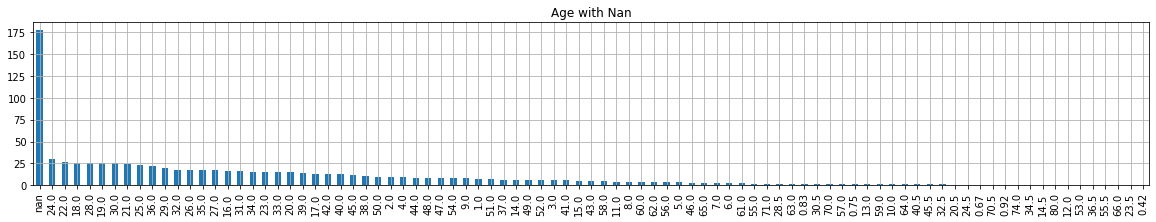

In [118]:
df_train['Age'].value_counts(dropna=False).plot.bar(title='Age with Nan', grid=True, figsize=(20, 3))

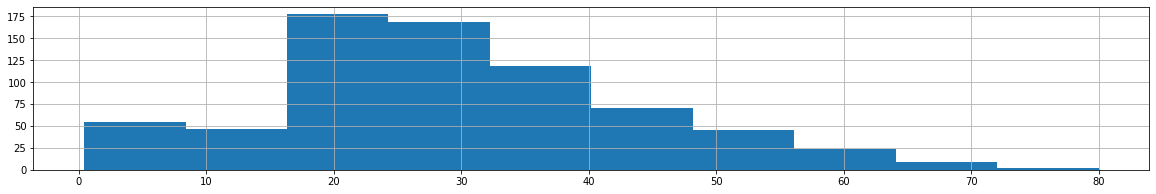

In [119]:
df_train['Age'].sort_values().hist(figsize=(20, 3))

In [120]:
# Do a little research:
# Get a df of just the ones with NaN for Age
##df_NaNage = df_train[~(df_train['Age'] == df_train['Age'])]
# Average survival for these:
##df_NaNage['Survived'].mean()
# This gives survival rate of 0.2937 for the age = NaNs,
# compared to 0.38 for all train samples.
# Could use Name information (Mr, Mrs, Miss, Master) to assign an age...
# Or flag the NaN ages by setting age to something like 99:

df_train['Age'].fillna(99.0, inplace=True)
df_test['Age'].fillna(99.0, inplace=True)

# Add a new numeric column flagging that no age was given:

df_train['NoAge'] = 1.0*(df_train['Age'] > 95.0)
df_test['NoAge'] = 1.0*(df_test['Age'] > 95.0)

In [121]:
df_train[['Age', 'NoAge']][4:7].head(10)

,Age,NoAge
4,35.0,0.0
5,99.0,1.0
6,54.0,0.0


In [122]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_M', 'Sex_F', 'NoAge'],
      dtype='object')

In [123]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_M,Sex_F,NoAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0.0


In [124]:
df_train.loc[2:3, :]
df_train.loc[2:3, 'Sex':'Ticket']
df_train.loc[2, 'Age']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_M,Sex_F,NoAge
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0,0,1,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,1,0,0,0,1,0.0


,Sex,Age,SibSp,Parch,Ticket
2,female,26.0,0,0,STON/O2. 3101282
3,female,35.0,1,0,113803


26.0

In [125]:
# but for Logistic Regression better to set to the trains median value(?)
##age_median = df_train['Age'].median()
##df_train['Age'].fillna(age_median, inplace=True)
##df_test['Age'].fillna(age_median, inplace=True)
# Or randomly set the NoAge ones in the range 18 to 40:

for inoage in df_train[df_train['NoAge'] == 1.0].index:
    df_train.loc[inoage,'Age'] = int(18.0+(40.0-18.0)*np.random.rand())
for inoage in df_test[df_test['NoAge'] == 1.0].index:
    df_test.loc[inoage,'Age'] = int(18.0+(40.0-18.0)*np.random.rand())

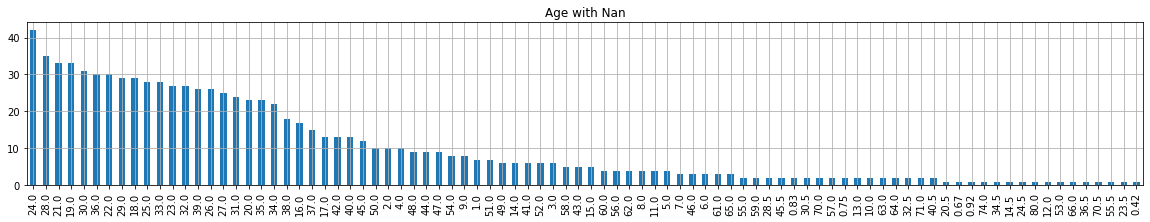

In [126]:
df_train['Age'].value_counts(dropna=False).plot.bar(title='Age with Nan', grid=True, figsize=(20, 3))

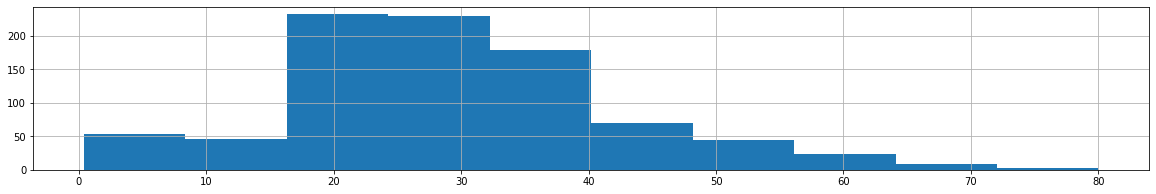

In [127]:
df_train['Age'].sort_values(ascending=True).hist()

### np.log(1.0+df_train['Age'])에서 1을 더하는 이유는 원자료값이 1이하인 값이 음수가 되는 것을 방지 0.92-> np.log취하면 -0.0833음수가 됨

In [128]:
# OK, the Age NaNs are taken care of...

# Make a log(Age): 지수함수의 역함수인 로그함수는 밑이 자연상수 e, 혹은 10, 또는 2 이냐에 따라서 np.log(x), np.log10(x), np.log2(x) 를 구분해서 사용합니다.
df_train['Age_log'] = np.log(1.0+df_train['Age'])
df_test['Age_log'] = np.log(1.0+df_test['Age'])

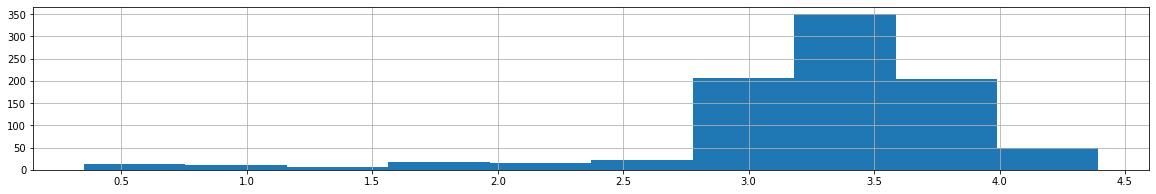

In [129]:
df_train['Age_log'].sort_values(ascending=True).hist()

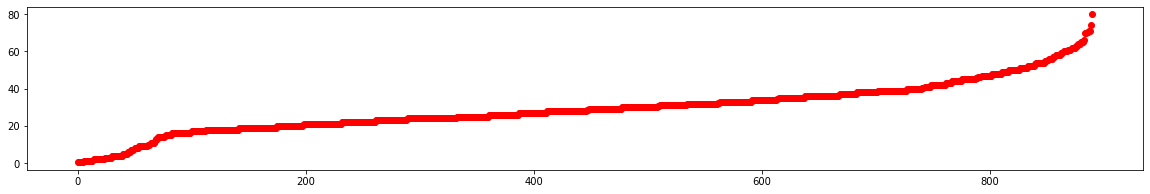

In [130]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(df_train['Age'].index, df_train['Age'].sort_values(ascending=True), color='r', marker='o')

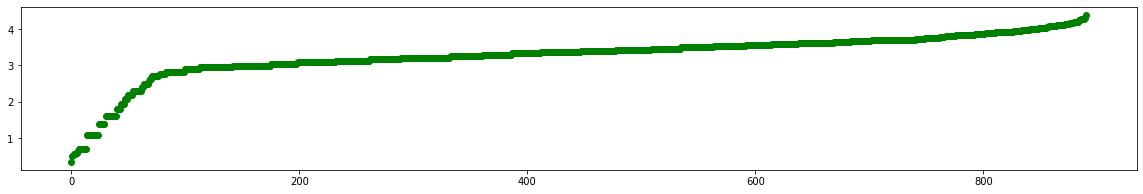

In [131]:
plt.scatter(df_train['Age_log'].index, df_train['Age_log'].sort_values(ascending=True), color='g', marker='o')

## 19살 이하가 'Age_young' np.log값이 3이하이며 

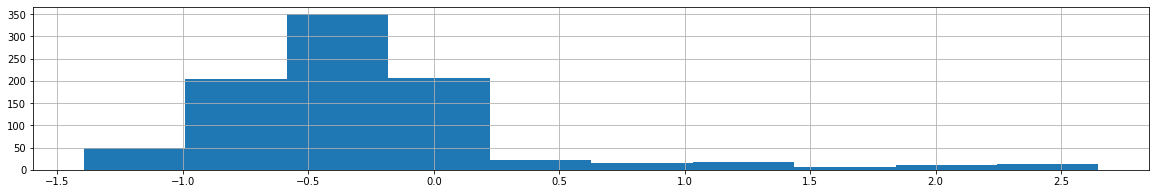

In [132]:
(3.0 - df_train['Age_log']).hist()

In [133]:
# Make Age_young, Age_old: a ReLU-ish on ends of age
df_train['Age_young'] = (3.0 - df_train['Age_log'])
df_train.loc[df_train['Age_young'] < 0.0, 'Age_young'] = 0.0
df_train['Age_old'] = (df_train['Age_log'] - 3.8)
df_train.loc[df_train['Age_old'] < 0.0, 'Age_old'] = 0.0

# and for test
df_test['Age_young'] = (3.0 - df_test['Age_log'])
df_test.loc[df_test['Age_young'] < 0.0, 'Age_young'] = 0.0
df_test['Age_old'] = (df_test['Age_log'] - 3.8)
df_test.loc[df_test['Age_old'] < 0.0, 'Age_old'] = 0.0

# --- SibSp and Parch :

In [134]:
df_train['SibSp'].value_counts(dropna=False), df_train['Parch'].value_counts(dropna=False)

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64, 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: Parch, dtype: int64)

In [135]:
# Try limiting these to just 0, 1, 2, 3, 4 :
cols = ['SibSp','Parch']
for col in cols:
    df_train.loc[(df_train[col] > 4), col] = 4

In [136]:
df_train['SibSp'].value_counts(dropna=False), df_train['Parch'].value_counts(dropna=False)

(0    608
 1    209
 4     30
 2     28
 3     16
 Name: SibSp, dtype: int64, 0    678
 1    118
 2     80
 4     10
 3      5
 Name: Parch, dtype: int64)

# --- Fare:

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

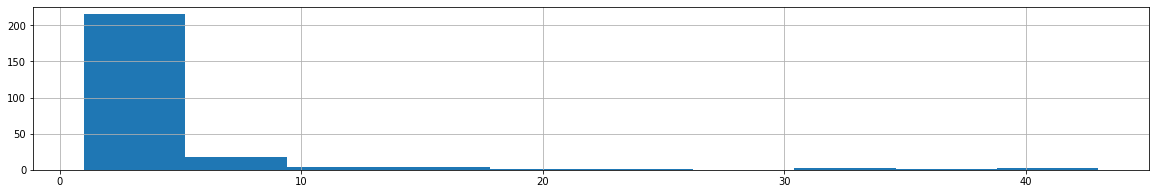

In [137]:
df_train['Fare'].value_counts()
df_train['Fare'].value_counts().hist()

## Add Fare_zero flag for very low fares:

In [138]:
# --- Ticket: complex string, ignore.

# One of the Test cases has NaN for the Fare:
# 152	1044	3	Storey, Mr. Thomas	1	60.5	0	0	3701	NaN	ooo	S
# Look at similar ones in test 
##df_test[(df_test['Pclass'] == 3) & (df_test['Embarked'] == 'S')].head(20)
# Set it to 9.2250 based on another 4-digit ticket:
# 5	897	3	Svensson, Mr. Johan Cervin	1	14.0	0	0	7538	9.2250	ooo	S
df_test.loc[152,'Fare'] = 9.2250

#
# Add Fare_zero flag for very low fares:
df_train['Fare_0'] = (df_train['Fare'] < 6.0).astype(int)
df_test['Fare_0'] = (df_test['Fare'] < 6.0).astype(int)

In [139]:
df_train['Fare_0'].value_counts() # 6보다 적은 값을 가진 드문 경우는 True로 인식하여 1로 만듬

0    874
1     17
Name: Fare_0, dtype: int64

### Set a nominal Fare for the Fare_0 ones, based on the Pclass:

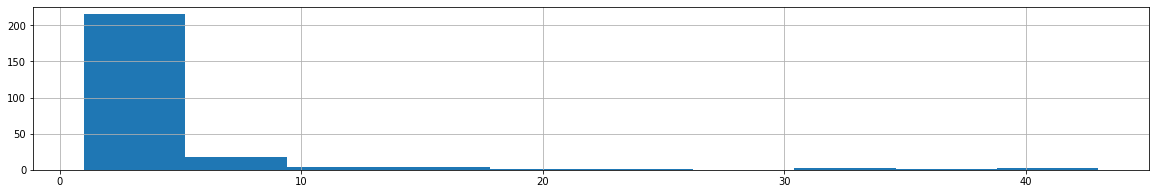

In [140]:
df_train['Fare'].value_counts().hist()

In [141]:
fare_class = np.exp([2.0, 2.4, 3.3])
fare_class
[fare_class[pclass-1] for pclass in [1,2,3]]
    

array([ 7.3890561 , 11.02317638, 27.11263892])

[7.38905609893065, 11.023176380641601, 27.112638920657883]

In [142]:
df_train[['Fare', 'Pclass', 'Fare_0']][df_train['Fare_0'] == 1]

,Fare,Pclass,Fare_0
179,0.0000,3,1
263,0.0000,1,1
271,0.0000,3,1
277,0.0000,2,1
302,0.0000,3,1
378,4.0125,3,1
413,0.0000,2,1
466,0.0000,2,1
481,0.0000,2,1
597,0.0000,3,1


In [143]:
# Set a nominal Fare for the Fare_0 ones, based on the Pclass:
fare_class = np.exp([2.0, 2.4, 3.3])
for pclass in [1,2,3]:
    df_train.loc[(df_train['Pclass'] == pclass) & \
                 (df_train['Fare_0'] == 1), 'Fare'] = fare_class[pclass-1]
    df_test.loc[(df_test['Pclass'] == pclass) & \
                (df_test['Fare_0'] == 1), 'Fare'] = fare_class[pclass-1]

In [144]:
# and make log(Fare):
df_train['Fare_log'] = np.log(df_train['Fare'])
df_test['Fare_log'] = np.log(df_test['Fare'])

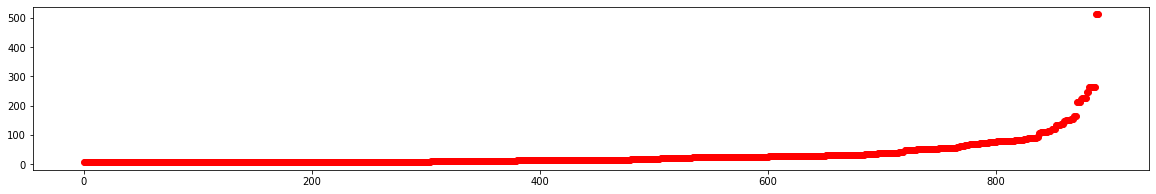

In [145]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(df_train['Fare'].index, df_train['Fare'].sort_values(ascending=True), color='r', marker='o')

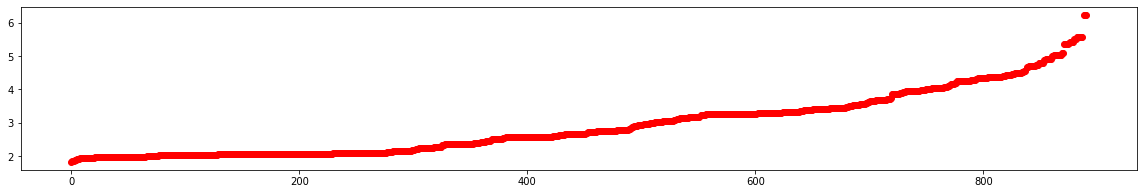

In [146]:
plt.scatter(df_train['Fare_log'].index, df_train['Fare_log'].sort_values(ascending=True), color='r', marker='o')

# --- Cabin: replace NaNs with "ooo"

In [147]:
df_train['Cabin'].value_counts(dropna=False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
A31              1
A36              1
D6               1
C99              1
B19              1
Name: Cabin, Length: 148, dtype: int64

In [148]:
#
df_train['Cabin'].fillna("ooo", inplace=True)
df_test['Cabin'].fillna("ooo", inplace=True)

# add a new numeric column flagging no cabin:
df_train['NoCabin'] = 1.0*(df_train['Cabin'] == "ooo")
df_test['NoCabin'] = 1.0*(df_test['Cabin'] == "ooo")

In [149]:
df_train['Cabin'].value_counts(dropna=False)

ooo            687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
A31              1
A36              1
D6               1
C99              1
B78              1
Name: Cabin, Length: 148, dtype: int64

# --- Embarked:

In [150]:
df_train['Embarked'].value_counts(dropna=False)
df_train[df_train['Embarked'].isnull()]

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_M,Sex_F,NoAge,Age_log,Age_young,Age_old,Fare_0,Fare_log,NoCabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,0,0,1,0.0,3.663562,0.0,0.000000,0,4.382027,0.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,0,0,1,0.0,4.143135,0.0,0.343135,0,4.382027,0.0


In [151]:
# Two of the train rows have NaN for Embarked - set them to S:
df_train.loc[61,'Embarked'] = 'S'
df_train.loc[829,'Embarked'] = 'S'

#
# Create one-hot versions of Embarked:
df_train['Embark_C'] = (df_train['Embarked'] == "C").astype(int)
df_train['Embark_Q'] = (df_train['Embarked'] == "Q").astype(int)
df_train['Embark_S'] = (df_train['Embarked'] == "S").astype(int)
#
df_test['Embark_C'] = (df_test['Embarked'] == "C").astype(int)
df_test['Embark_Q'] = (df_test['Embarked'] == "Q").astype(int)
df_test['Embark_S'] = (df_test['Embarked'] == "S").astype(int)


# Done with basic features.

## <a id="NameFeats">Features from Name</a>
Back to <a href="#Index">Index</a>

In [152]:
# Look at the Name column... all unique names it seems.
df_train['Name'].value_counts().index

Index(['Moran, Mr. James', 'Barah, Mr. Hanna Assi',
       'Minahan, Dr. William Edward', 'Reed, Mr. James George',
       'Vovk, Mr. Janko', 'Butt, Major. Archibald Willingham',
       'Lindblom, Miss. Augusta Charlotta', 'Dean, Master. Bertram Vere',
       'Hays, Mrs. Charles Melville (Clara Jennings Gregg)',
       'Doling, Mrs. John T (Ada Julia Bone)',
       ...
       'Lefebre, Miss. Ida',
       'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)',
       'Nankoff, Mr. Minko', 'Youseff, Mr. Gerious',
       'Banfield, Mr. Frederick James', 'Niskanen, Mr. Juha',
       'Porter, Mr. Walter Chamberlain', 'Dahlberg, Miss. Gerda Ulrika',
       'Drazenoic, Mr. Jozef', 'Pears, Mrs. Thomas (Edith Wearne)'],
      dtype='object', length=891)

# Extract the last name from the Name column
### apply 변환
행이나 열 단위로 더 복잡한 처리를 하고 싶을 때는 apply 메서드를 사용한다. 인수로 행 또는 열을 받는 함수를 apply 메서드의 인수로 넣으면 <font color='red'>각 열(또는 행)을 반복하여 그 함수에 적용시킨다.

In [153]:
df_train['Name'].head()
df_train['Name'][0].split(',')[0]
df_train['Name'][1].split(',')[0]
# df_train['Name'].split(',')[0] # AttributeError: 'Series' object has no attribute 'split'

'Bra---und, Mr. Owen Harris'.split(',')[0].replace('---',"")
#'Bra---und, Mr. Owen Harris'.split(',').replace('---',"") # AttributeError: 'list' object has no attribute 'replace'

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

'Braund'

'Cumings'

'Braund'

In [154]:
def extract_last(row_in):
    lastname = row_in['Name'].split(',')[0] # string type
    # replace "'", " ", and "-" with nothing (for now)
    ignores = ["'"," ","-"]
    for iggy in ignores:
        lastname = lastname.replace(iggy,"")
    return lastname

# Put the last names in LastName
df_train['LastName'] = df_train.apply(extract_last, axis=1)
df_test['LastName'] = df_test.apply(extract_last, axis=1)

In [155]:
df_train['LastName'].head(3)

0       Braund
1      Cumings
2    Heikkinen
Name: LastName, dtype: object

In [156]:
# Look at the LastName column... 9 Andersson the most.
##df_train['LastName'].value_counts()

In [157]:
# Extract Mr, Mrs, Miss, Master from the Name column
def extract_MMMM(row_in):
    # first take from the Comma+Space on
    prefix = row_in['Name'].split(', ')[1]
    # then take before the ".":
    prefix = prefix.split(".")[0]
    # modify ones that are not Mr Mrs Miss Master:
    if not(prefix in ["Mr","Mrs","Miss","Master"]):
        if prefix in ["Rev", "Col", "Major", "Sir", "Jonkheer", "Don", "Capt"]:
            prefix = "Mr"
        elif prefix in ["Ms", "Mme", "the Countess", "Lady", "Dona"]:
            prefix = "Mrs"
        elif prefix in ["Mlle"]:
            prefix = "Miss"
        elif prefix in ["Dr"]:
            # can be a female Dr:
            if row_in['Sex'] == 'female':
                prefix = "Mrs"
            else:
                prefix = "Mr"
    ##print("prefix is -->"+prefix+"<--")
    return prefix

# Put the prefix in a column
df_train['MMMM'] = df_train.apply(extract_MMMM, axis=1)
df_test['MMMM'] = df_test.apply(extract_MMMM, axis=1)

In [158]:
# Look at the MMMM counts
# ( Without any corrections implemented in extract_MMMM,
#   use value_counts to identify prefixs other than Mr Mrs Miss and Master:
#   Alternatives found:
#   Master: (no other versions)
#      Mrs: Ms, Mme, the Countess, Lady, Dona
#     Miss: Mlle
#       Mr: Dr, Rev, Col, Major, Sir, Jonkheer, Don, Capt 
#   incorporate these in extract_MMMM above.)

print("\nTrain:\n")
print(df_train['MMMM'].value_counts())
print("\nTEST:\n")
print(df_test['MMMM'].value_counts())


Train:

Mr        537
Miss      184
Mrs       130
Master     40
Name: MMMM, dtype: int64

TEST:

Mr        245
Miss       78
Mrs        74
Master     21
Name: MMMM, dtype: int64


In [159]:
# Look at the survival of these different prefixes:
df_train[['Survived','MMMM']].groupby('MMMM').mean()

,Survived
MMMM,
Master,0.575000
Miss,0.701087
Mr,0.160149
Mrs,0.800000


## self-study

In [160]:
df_train['MMMM'].head()

df_train['MMMM'].value_counts()
df_train['MMMM'] == "Mr"
(df_train['MMMM'] == "Mr").astype(int) # True가 '1'이니까

# binary encode
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(df_train['MMMM'].values.reshape(-1, 1))
onehot_encoder.fit_transform(df_train['MMMM'].values.reshape(-1, 1))[0:10, :]

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: MMMM, dtype: object

Mr        537
Miss      184
Mrs       130
Master     40
Name: MMMM, dtype: int64

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: MMMM, Length: 891, dtype: bool

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: MMMM, Length: 891, dtype: int32

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [161]:
# Create one-hot versions of the prefixes:
for prefix in ["Mr","Master","Mrs","Miss"]:
    df_train['Sex_'+prefix] = (df_train['MMMM'] == prefix).astype(int)
    df_test['Sex_'+prefix] = (df_test['MMMM'] == prefix).astype(int)

In [162]:
df_train[['MMMM', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss']].head(10)

,MMMM,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss
0,Mr,1,0,0,0
1,Mrs,0,0,1,0
2,Miss,0,0,0,1
3,Mrs,0,0,1,0
4,Mr,1,0,0,0
5,Mr,1,0,0,0
6,Mr,1,0,0,0
7,Master,0,1,0,0
8,Mrs,0,0,1,0
9,Mrs,0,0,1,0


In [163]:
# Create some features from the LastName

# Get the length of the LastName
def extract_ln_length(row_in):
    lastname = row_in['LastName']
    return len(lastname)

# Count the vowels in LastName
def extract_ln_vowels(row_in):
    lastname = row_in['LastName']
    num_vs = 0
    vowels_list = ["a","e","i","o","u","y"]
    for char in lastname.lower():
        if char in vowels_list:
            num_vs += 1
    return num_vs

# Put the last name lengths and vowels in LN_Length, LN_Vowels
df_train['LN_Length'] = df_train.apply(extract_ln_length, axis=1)
df_test['LN_Length'] = df_test.apply(extract_ln_length, axis=1)
df_train['LN_Vowels'] = df_train.apply(extract_ln_vowels, axis=1)
df_test['LN_Vowels'] = df_test.apply(extract_ln_vowels, axis=1)
# And the ratio
df_train['LN_Vfrac'] = df_train['LN_Vowels']/df_train['LN_Length']
df_test['LN_Vfrac'] = df_test['LN_Vowels']/df_test['LN_Length']

In [164]:
df_train[['Name', 'LN_Length', 'LastName', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss', 'MMMM', 'LN_Vowels', 'LN_Vfrac']].head(10)

,Name,LN_Length,LastName,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,MMMM,LN_Vowels,LN_Vfrac
0,"Braund, Mr. Owen Harris",6,Braund,1,0,0,0,Mr,2,0.333333
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",7,Cumings,0,0,1,0,Mrs,2,0.285714
2,"Heikkinen, Miss. Laina",9,Heikkinen,0,0,0,1,Miss,4,0.444444
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",8,Futrelle,0,0,1,0,Mrs,3,0.375000
4,"Allen, Mr. William Henry",5,Allen,1,0,0,0,Mr,2,0.400000
5,"Moran, Mr. James",5,Moran,1,0,0,0,Mr,2,0.400000
6,"McCarthy, Mr. Timothy J",8,McCarthy,1,0,0,0,Mr,2,0.250000
7,"Palsson, Master. Gosta Leonard",7,Palsson,0,1,0,0,Master,2,0.285714
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",7,Johnson,0,0,1,0,Mrs,2,0.285714
9,"Nasser, Mrs. Nicholas (Adele Achem)",6,Nasser,0,0,1,0,Mrs,2,0.333333


### Check for any NaNs in the Train,Test data

In [165]:
# Check for NaN's in the data sets
# Go through the columns one at a time
# For Titanic the Age is the most NaN'ed column...

n_train = len(df_train)
n_test = len(df_test)
print("\nChecking for NaNs:\n")
all_ok = True
for col in df_test.columns:
    nona_train = len(df_train[col].dropna(axis=0))
    nanpc_train = 100.0*(n_train-nona_train)/n_train
    nona_test = len(df_test[col].dropna(axis=0))
    nanpc_test = 100.0*(n_test-nona_test)/n_test
    # Only show it if there are NaNs:
    if (nanpc_train + nanpc_test > 0.0):
        print("{:.3f}%  {} OK out of {}".format(nanpc_train, nona_train, n_train), "  "+col)
        print("{:.3f}%  {} OK out of {}".format(nanpc_test, nona_test, n_test), "  "+col)
        all_ok = False
if all_ok:
    print("   All OK - no NaNs found.\n")


Checking for NaNs:

   All OK - no NaNs found.



### Finished making features

In [166]:
# Look at the data now...
df_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embark_S,LastName,MMMM,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vowels,LN_Vfrac
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,Braund,Mr,1,0,0,0,6,2,0.333333
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,Cumings,Mrs,0,0,1,0,7,2,0.285714
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Heikkinen,Miss,0,0,0,1,9,4,0.444444
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,Futrelle,Mrs,0,0,1,0,8,3,0.375000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Allen,Mr,1,0,0,0,5,2,0.400000
5,6,0,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,...,0,Moran,Mr,1,0,0,0,5,2,0.400000


In [167]:
# and the Test data
df_test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embark_S,LastName,MMMM,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vowels,LN_Vfrac
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,ooo,...,0,Kelly,Mr,1,0,0,0,5,2,0.400000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,ooo,...,1,Wilkes,Mrs,0,0,1,0,6,2,0.333333
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,ooo,...,0,Myles,Mr,1,0,0,0,5,2,0.400000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,ooo,...,1,Wirz,Mr,1,0,0,0,4,1,0.250000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,ooo,...,1,Hirvonen,Mrs,0,0,1,0,8,3,0.375000
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,ooo,...,1,Svensson,Mr,1,0,0,0,8,2,0.250000


## <a id="FeatureSummary">Summary of the Features</a>
Back to <a href="#Index">Index</a>

### Compare Train and Test Averages

In [168]:
# Compare Train and Test averages
# Using a z-score with standard error based on the number of samples
descr_train = df_train.describe()
descr_test = df_test.describe()
# Number of samples in the test set
n_test = descr_test.loc["count","Age"]
n_train = descr_train.loc["count","Age"]
if SHOW_EDA:
    print("     --column--    z-score      Test Mean     Train Mean")
for col in descr_test.columns:
    ave_test = descr_test.loc["mean",col]
    ave_train = descr_train.loc["mean",col]
    std_train = descr_train.loc["std",col]
    if SHOW_EDA:
        print(col.rjust(15), 
            '{:.4f}'.format((ave_test - ave_train)/
                               (std_train*np.sqrt(1.0/n_test+1.0/n_train))).rjust(10),
            '{:.4f}'.format(ave_test).rjust(14),
            '{:.4f}'.format(ave_train).rjust(14))

     --column--    z-score      Test Mean     Train Mean
    PassengerId    42.8979      1100.5000       446.0000
         Pclass    -0.8694         2.2656         2.3086
            Age     0.6030        30.0323        29.5569
          SibSp    -0.7167         0.4474         0.4860
          Parch     0.4112         0.3923         0.3737
           Fare     1.0842        35.6567        32.4702
       Survived   -47.9708        -1.0000         0.3838
       Pclass_1     0.5333         0.2560         0.2424
       Pclass_2     0.6654         0.2225         0.2065
       Pclass_3    -1.0011         0.5215         0.5511
          NoAge     0.2995         0.2057         0.1987
        Age_log     0.8686         3.3146         3.2826
      Age_young    -1.0574         0.0959         0.1224
        Age_old     0.3372         0.0266         0.0250
         Fare_0    -1.4667         0.0072         0.0191
       Fare_log     0.3753         2.9593         2.9386
        NoCabin     0.4515     

### Show scatter plots of some values

Text(0.5, 1.0, 'Showing All  (red=Perished)')

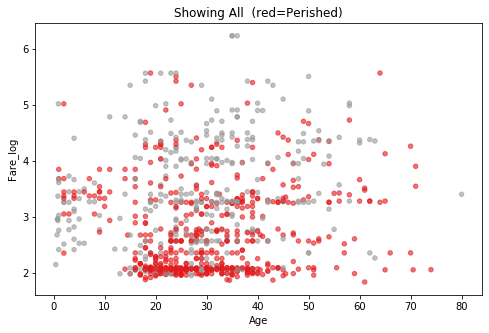

Text(0.5, 1.0, 'Showing only Mrs  (red=Perished)')

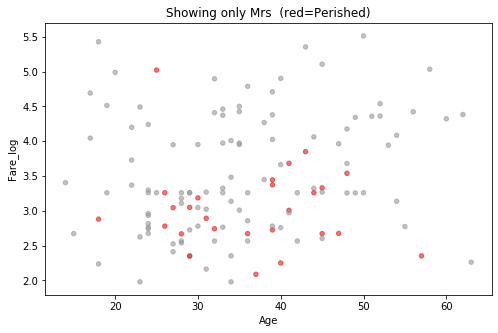

In [169]:
df_train.plot.scatter("Age","Fare_log",
                        figsize=(8,5),c='Survived',alpha=0.6,colormap="Set1",colorbar=False)
plt.title("Showing All  (red=Perished)")
plt.show()
prefix = "Mrs"
df_train[df_train['MMMM'] == prefix].plot.scatter("Age","Fare_log",
                        figsize=(8,5),c='Survived',alpha=0.6,colormap="Set1",colorbar=False)
plt.title("Showing only "+prefix+"  (red=Perished)")
plt.show()

Text(0.5, 1.0, 'Showing All  (red=Perished)')

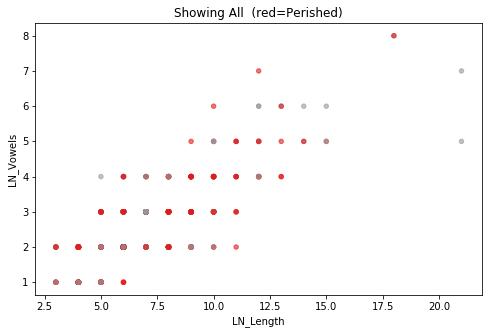

Text(0.5, 1.0, 'Showing All  (red=Perished)')

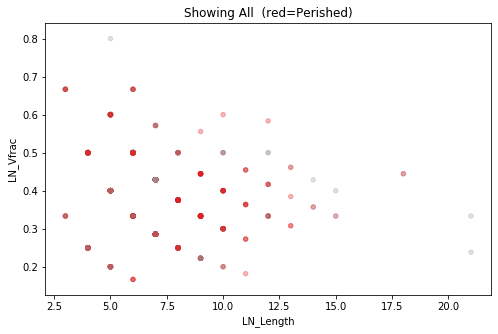

In [170]:
df_train.plot.scatter("LN_Length","LN_Vowels",
                        figsize=(8,5),c='Survived',alpha=0.6,colormap="Set1",colorbar=False)
plt.title("Showing All  (red=Perished)")
plt.show()

df_train.plot.scatter("LN_Length","LN_Vfrac",
                        figsize=(8,5),c='Survived',alpha=0.3,colormap="Set1",colorbar=False)
plt.title("Showing All  (red=Perished)")
plt.show()

Text(1.8, 0.5, 'Females')

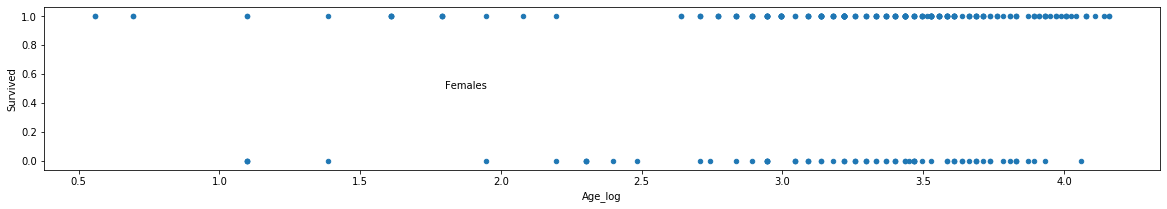

Text(1.9, 0.5, 'Males')

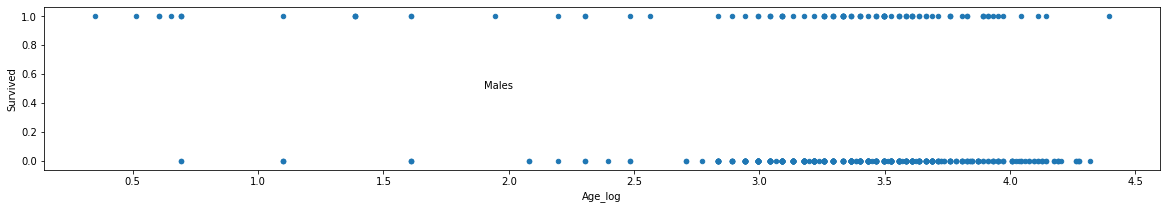

In [171]:
# Survival vs Age for Females, Males
df_train[df_train['Sex_F'] == 1].plot.scatter('Age_log','Survived')
plt.text(1.8, 0.5,"Females")
plt.show()
df_train[df_train['Sex_M'] == 1].plot.scatter('Age_log','Survived')
plt.text(1.9, 0.5,"Males")
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1afc66bfa88>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1afc66b3b48>}

Text(0.5, 1.0, 'Survived           Selection: All            Perished')

Text(0.5, 0, '')

Text(0, 0.5, 'Age')

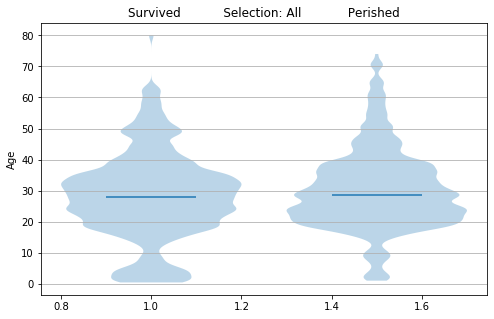

{'bodies': [<matplotlib.collections.PolyCollection at 0x1afc6731f48>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1afc6727a88>}

Text(0.5, 1.0, 'Survived           Selection: Male            Perished')

Text(0.5, 0, '')

Text(0, 0.5, 'Age')

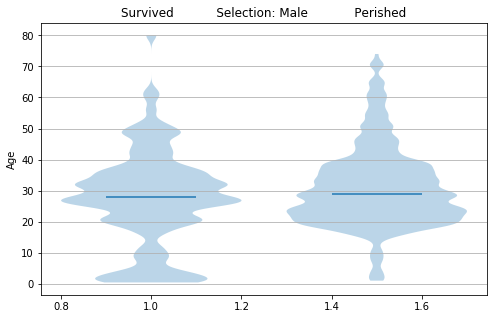

{'bodies': [<matplotlib.collections.PolyCollection at 0x1afc67ea808>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1afc67df348>}

Text(0.5, 1.0, 'Survived           Selection: Female            Perished')

Text(0.5, 0, '')

Text(0, 0.5, 'Age')

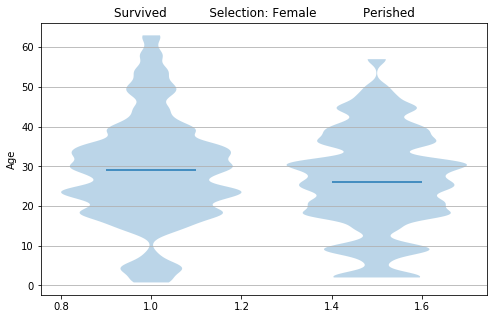

In [172]:
# Try the violin plot - Male, Female categories
# choose a numerical column:
vpcol = "Age" #  or can use "Fare_log"

# Simple histogram as a check
##df_train['Age'].plot.hist(figsize=(8,5), bins=50)

df = df_train
status_str = 'All'

fig, axes = plt.subplots(figsize=(8,5))

axes.violinplot(dataset = [df[df.Survived == 1][vpcol].values,
                           df[df.Survived == 0][vpcol].values],
               positions=[1.0,1.5],
               widths=0.4,
               showmeans=False, showmedians=True, showextrema=False,
               points=1000,
               bw_method=0.1,  # 'scott', 'silverman', or a scalar 
               vert=True)

axes.set_title("Survived           Selection: "+status_str+"            Perished")
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel(vpcol)

plt.show()


df = df_train[df_train['Sex'] == 'male']
status_str = 'Male'

fig, axes = plt.subplots(figsize=(8,5))

axes.violinplot(dataset = [df[df.Survived == 1][vpcol].values,
                           df[df.Survived == 0][vpcol].values],
               positions=[1.0,1.5],
               widths=0.4,
               showmeans=False, showmedians=True, showextrema=False,
               points=1000,
               bw_method=0.1,  # 'scott', 'silverman', or a scalar 
               vert=True)

axes.set_title("Survived           Selection: "+status_str+"            Perished")
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel(vpcol)

plt.show()


df = df_train[df_train['Sex'] == 'female']
status_str = 'Female'

fig, axes = plt.subplots(figsize=(8,5))

axes.violinplot(dataset = [df[df.Survived == 1][vpcol].values,
                           df[df.Survived == 0][vpcol].values],
               positions=[1.0,1.5],
               widths=0.4,
               showmeans=False, showmedians=True, showextrema=False,
               points=1000,
               bw_method=0.1,  # 'scott', 'silverman', or a scalar 
               vert=True)

axes.set_title("Survived           Selection: "+status_str+"            Perished")
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel(vpcol)

plt.show()


In [173]:
# How do Age and Fare depend on Pclass

##df_train.plot.scatter('Age_log','Pclass')
##plt.show()
##df_train.plot.scatter('Fare_log','Pclass')
##plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1afc6859988>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1afc6851dc8>}

Text(0.5, 1.0, 'Perish/Survival for Pclasses, vs Age')

Text(0.5, 0, 'Perish                Survive                              Perish                Survive                              Perish                Survive')

Text(0, 0.5, 'Age')

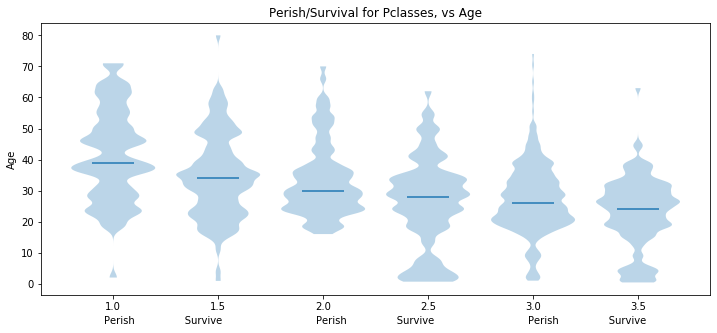

In [174]:
# Try the violin plot - Pclass categories
# choose a numerical column:
vpcol = "Age" #"Fare_log" # or can use "Age"


# Select survival status
dfs = df_train[df_train['Survived'] == 1].copy()
dfp = df_train[df_train['Survived'] == 0].copy()

fig, axes = plt.subplots(figsize=(12,5))
axes.violinplot(dataset = [dfs[dfs.Pclass == 1][vpcol].values,
                           dfs[dfs.Pclass == 2][vpcol].values,
                           dfs[dfs.Pclass == 3][vpcol].values,
                        dfp[dfp.Pclass == 1][vpcol].values,
                        dfp[dfp.Pclass == 2][vpcol].values,
                        dfp[dfp.Pclass == 3][vpcol].values],
               positions=[1.5,2.5,3.5,1.0,2.0,3.0],
               widths=0.4,
               showmeans=False, showmedians=True, showextrema=False,
               points=1000,
               bw_method=0.1,  # 'scott', 'silverman', or a scalar 
               vert=True)

axes.set_title("Perish/Survival for Pclasses, vs "+vpcol)
axes.yaxis.grid(False)
persur_str = "Perish                Survive"
axes.set_xlabel(persur_str + 30*" " + persur_str + 30*" " + persur_str)
axes.set_ylabel(vpcol)

plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1afc6896488>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1afc6896448>}

Text(0.5, 1.0, 'Perish/Survival for Pclasses, vs Fare_log')

Text(0.5, 0, 'Perish                Survive                              Perish                Survive                              Perish                Survive')

Text(0, 0.5, 'Fare_log')

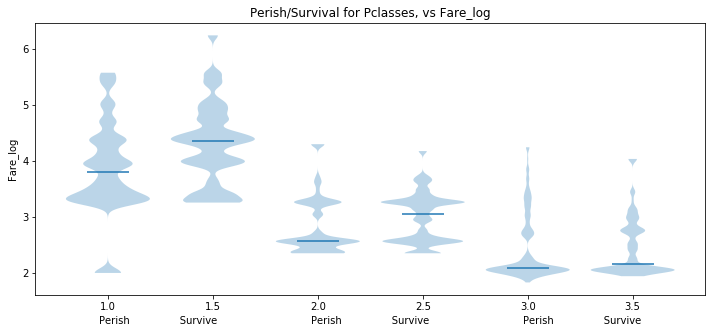

In [175]:
# Try the violin plot - Pclass categories
# choose a numerical column:
vpcol = "Fare_log" #"Fare_log" # or can use "Age"


# Select survival status
dfs = df_train[df_train['Survived'] == 1].copy()
dfp = df_train[df_train['Survived'] == 0].copy()

fig, axes = plt.subplots(figsize=(12,5))
axes.violinplot(dataset = [dfs[dfs.Pclass == 1][vpcol].values,
                           dfs[dfs.Pclass == 2][vpcol].values,
                           dfs[dfs.Pclass == 3][vpcol].values,
                        dfp[dfp.Pclass == 1][vpcol].values,
                        dfp[dfp.Pclass == 2][vpcol].values,
                        dfp[dfp.Pclass == 3][vpcol].values],
               positions=[1.5,2.5,3.5,1.0,2.0,3.0],
               widths=0.4,
               showmeans=False, showmedians=True, showextrema=False,
               points=1000,
               bw_method=0.1,  # 'scott', 'silverman', or a scalar 
               vert=True)

axes.set_title("Perish/Survival for Pclasses, vs "+vpcol)
axes.yaxis.grid(False)
persur_str = "Perish                Survive"
axes.set_xlabel(persur_str + 30*" " + persur_str + 30*" " + persur_str)
axes.set_ylabel(vpcol)

plt.show()

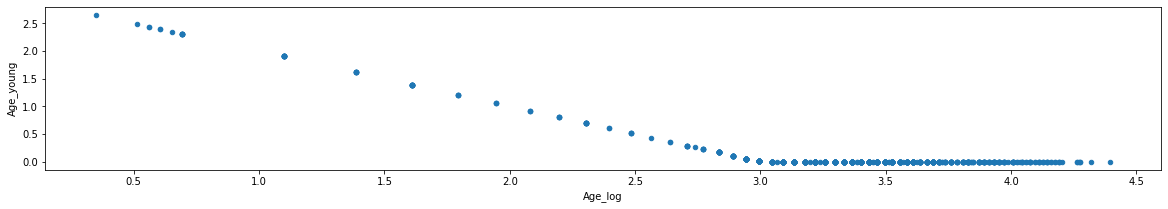

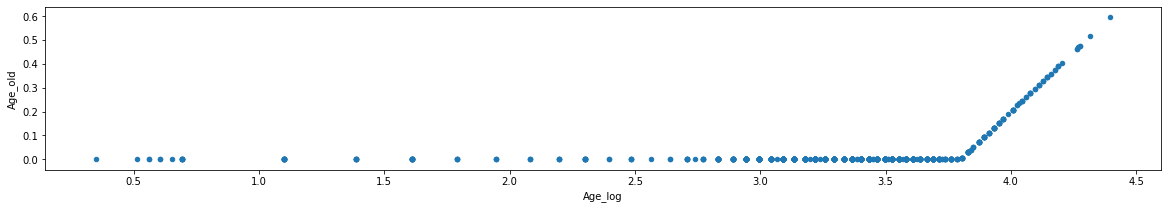

In [176]:
# These two Age-based features 'signal' low and high ages,
# probably most useful for simple Logisitic Rgression.
df_train.plot.scatter('Age_log','Age_young')
plt.show()
df_train.plot.scatter('Age_log','Age_old')
plt.show()


## Correlation with Survived

In [177]:
# Look at the correlation between the numerical values
corr_df = df_train.corr()
# In particular the correlations with Survived:
print(corr_df.Survived)

# There are a bunch with abs(corr) at/above 0.2:
# [Pclass], [Fare], Pclass_1, Pclass_3, Fare_log, Sex_M,F, NoCabin
# (ones in [ ]s are not used as features since others duplicate them.)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.072194
SibSp         -0.010680
Parch          0.091304
Fare           0.254957
Pclass_1       0.285904
Pclass_2       0.093349
Pclass_3      -0.322308
Sex_M         -0.543351
Sex_F          0.543351
NoAge         -0.092197
Age_log       -0.119163
Age_young      0.147075
Age_old       -0.025035
Fare_0        -0.093207
Fare_log       0.327730
NoCabin       -0.316912
Embark_C       0.168240
Embark_Q       0.003650
Embark_S      -0.149683
Sex_Mr        -0.566512
Sex_Master     0.085221
Sex_Mrs        0.353688
Sex_Miss       0.332795
LN_Length      0.030062
LN_Vowels      0.015017
LN_Vfrac      -0.022787
Name: Survived, dtype: float64


In [178]:
# All Features... the training numeric columns:
all_features = df_train.columns

# Remove the 'answer' column:
all_features = all_features.drop('Survived')
# and the PassengerId:
all_features = all_features.drop('PassengerId')

# List all of these potential features
print(len(all_features),"All features:")
print(all_features)

34 All features:
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_M',
       'Sex_F', 'NoAge', 'Age_log', 'Age_young', 'Age_old', 'Fare_0',
       'Fare_log', 'NoCabin', 'Embark_C', 'Embark_Q', 'Embark_S', 'LastName',
       'MMMM', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss', 'LN_Length',
       'LN_Vowels', 'LN_Vfrac'],
      dtype='object')


In [179]:
df_train[all_features].columns

df_train[all_features].Pclass.value_counts()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_M',
       'Sex_F', 'NoAge', 'Age_log', 'Age_young', 'Age_old', 'Fare_0',
       'Fare_log', 'NoCabin', 'Embark_C', 'Embark_Q', 'Embark_S', 'LastName',
       'MMMM', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss', 'LN_Length',
       'LN_Vowels', 'LN_Vfrac'],
      dtype='object')

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [180]:
# Can look at the value counts of a feature column ...
featnum=0
df_train[all_features[featnum]].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## <a id="MachineLearning">Machine Learning</a>
Back to <a href="#Index">Index</a>

### Some routines

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

In [182]:
# Use this routine to shown how the prediction is doing.
# This routine is taken from the file chirp_roc_lib.py in the github repo at: 
#   https://github.com/dan3dewey/chirp-to-ROC
# Some small modifications have been made here.

def y_yhat_plots(y, yh, title="y and y_score", y_thresh=0.5,
                     ROC=True, plots_prefix=None):
    """Output plots showing how y and y_hat are related:
    the "confusion dots" plot is analogous to the confusion table,
    and the standard ROC plot with its AOC value.
    The yp=1 threshold can be changed with the y_thresh parameter.
    y and yh are numpy arrays (not series or dataframe.)
    """
    # The predicted y value with threshold = y_thresh
    y_pred = 1.0 * (yh > y_thresh)

    # Show table of actual and predicted counts
    crosstab = pd.crosstab(y, y_pred, rownames=[
                           'Actual'], colnames=['  Predicted'])
    print("\nConfusion matrix (y_thresh={:.3f}):\n\n".format(y_thresh),
        crosstab)

    # Calculate the various metrics and rates
    tn = crosstab[0][0]
    fp = crosstab[1][0]
    fn = crosstab[0][1]
    tp = crosstab[1][1]

    ##print(" tn =",tn)
    ##print(" fp =",fp)
    ##print(" fn =",fn)
    ##print(" tp =",tp)

    this_fpr = fp / (fp + tn)
    this_fnr = fn / (fn + tp)

    this_recall = tp / (tp + fn)
    this_precision = tp / (tp + fp)
    this_accur = (tp + tn) / (tp + fn + fp + tn)

    this_posfrac = (tp + fn) / (tp + fn + fp + tn)

    print("\nResults:\n")
    print(" False Pos = ", 100.0 * this_fpr, "%")
    print(" False Neg = ", 100.0 * this_fnr, "%")
    print("    Recall = ", 100.0 * this_recall, "%")
    print(" Precision = ", 100.0 * this_precision, "%")
    print("\n    Accuracy = ", 100.0 * this_accur, "%")
    print(" Pos. fract. = ", 100.0 * this_posfrac, "%")

    # Put them in a dataframe for plots and ROC
    # Reduce the number if very large:
    if len(y) > 100000:
        reduce_by = int(0.5+len(y)/60000)
        print("\nUsing 1/{} of the points for dots and ROC plots.".format(reduce_by))
        ysframe = pd.DataFrame([y[0: :reduce_by], yh[0: :reduce_by], 
                                y_pred[0: :reduce_by]], index=[
                           'y', 'y-hat', 'y-pred']).transpose()
        plot_alpha = 0.3
    else:
        ysframe = pd.DataFrame([y, yh, y_pred], index=[
                           'y', 'y-hat', 'y-pred']).transpose()
        plot_alpha = 0.7

    # If the yh is discrete (0 and 1s only) then blur it a bit
    # for a better visual dots plot
    if min(abs(yh - 0.5)) > 0.49:
        ysframe["y-hat"] = (0.51 * ysframe["y-hat"]
                            + 0.49 * np.random.rand(len(yh)))

    # Make a "confusion dots" plot
    # Add a blurred y column
    ysframe['y (blurred)'] = ysframe['y'] + 0.1 * np.random.randn(len(ysframe))

    # Plot the real y (blurred) vs the predicted probability
    # Note the flipped ylim values.
    ysframe.plot.scatter('y-hat', 'y (blurred)', figsize=(12, 5),
                         s=2, xlim=(0.0, 1.0), ylim=(1.8, -0.8), alpha=plot_alpha)
    # show the "correct" locations on the plot
    plt.plot([0.0, y_thresh], [0.0, 0.0], '-',
        color='green', linewidth=5)
    plt.plot([y_thresh, y_thresh], [0.0, 1.0], '-',
        color='gray', linewidth=2)
    plt.plot([y_thresh, 1.0], [1.0, 1.0], '-',
        color='green', linewidth=5)
    plt.title("Confusion-dots Plot: " + title, fontsize=16)
    # some labels
    ythr2 = y_thresh/2.0
    plt.text(ythr2 - 0.03, 1.52, "FN", fontsize=16, color='red')
    plt.text(ythr2 + 0.5 - 0.03, 1.52, "TP", fontsize=16, color='green')
    plt.text(ythr2 - 0.03, -0.50, "TN", fontsize=16, color='green')
    plt.text(ythr2 + 0.5 - 0.03, -0.50, "FP", fontsize=16, color='red')

    if plots_prefix != None:
        plt.savefig(plots_prefix+"_dots.png")
    plt.show()

    # Go on to calculate and plot the ROC?
    if ROC == False:
        return 0


    # Make the ROC curve
    #
    # Set the y-hat as the index and sort on it
    ysframe = ysframe.set_index('y-hat').sort_index()
    # Put y-hat back as a column (but the sorting remains)
    ysframe = ysframe.reset_index()

    # Initialize the counts for threshold = 0
    p_thresh = 0
    FN = 0
    TN = 0
    TP = sum(ysframe['y'])
    FP = len(ysframe) - TP

    # Assemble the fpr and recall values
    recall = []
    fpr = []
    # Go through each sample in y-hat order,
    # advancing the threshold and adjusting the counts
    for iprob in range(len(ysframe['y-hat'])):
        p_thresh = ysframe.iloc[iprob]['y-hat']
        if ysframe.iloc[iprob]['y'] == 0:
            FP -= 1
            TN += 1
        else:
            TP -= 1
            FN += 1
        # Recall and FPR:
        recall.append(TP / (TP + FN))
        fpr.append(FP / (FP + TN))

    # Put recall and fpr in the dataframe
    ysframe['Recall'] = recall
    ysframe['FPR'] = fpr

    # - - - ROC - - - could be separate routine
    zoom_in = False

    # Calculate the area under the ROC
    roc_area = 0.0
    for ifpr in range(1, len(fpr)):
        # add on the bit of area (note sign change, going from high fpr to low)
        roc_area += 0.5 * (recall[ifpr] + recall[ifpr - 1]
                           ) * (fpr[ifpr - 1] - fpr[ifpr])

    plt.figure(figsize=(8, 8))
    plt.title("ROC: " + title, size=16)
    plt.plot(fpr, recall, '-b')
    # Set the scales
    if zoom_in:
        plt.xlim(0.0, 0.10)
        plt.ylim(0.0, 0.50)
    else:
        # full range:
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 1.0)

    # The reference line
    plt.plot([0., 1.], [0., 1.], '--', color='orange')

    # The point at the y_hat = y_tresh threshold
    if True:
        plt.plot([this_fpr], [this_recall], 'o', c='blue', markersize=15)
        plt.xlabel('False Postive Rate', size=16)
        plt.ylabel('Recall', size=16)
        plt.annotate('y_hat = {:.2f}'.format(y_thresh),
                            xy=(this_fpr+0.01 + 0.015,
                            this_recall), size=14, color='blue')
        plt.annotate(' Pos.Fraction = ' +
                        '  {:.0f}%'.format(100 * this_posfrac),
                        xy=(this_fpr + 0.03, this_recall - 0.045),
                        size=14, color='blue')

    # Show the ROC area (shows on zoomed-out plot)
    plt.annotate('ROC Area = ' + str(roc_area)
                 [:5], xy=(0.4, 0.1), size=16, color='blue')

    # Show the plot
    if plots_prefix != None:
        plt.savefig(plots_prefix+"_ROC.png")
    plt.show()

    return roc_area  # or ysframe

In [229]:
# Get X,y from dataframe
def get_Xy_values(df_in, features):
    # Extract and return the features, X dataframe, and target values, y (np.array).

    X = df_in[features].copy()
    y = df_in.Survived.values

    print("\nThe y target has {} values.\n".format(len(y)))
    return X, y

## <a id="SetupData">Features and the X,y Data</a>
Back to <a href="#Index">Index</a>

### Select the Features to use

In [184]:
##all_features

In [185]:
# Select which ones to use from all available:
# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
#       'Pclass_3', 'Sex_M', 'Sex_F', 'NoAge', 'Age_log', 'Age_young',
#       'Age_old', 'Fare_0', 'Fare_log', 'NoCabin', 'Embark_C', 'Embark_Q',
#       'Embark_S', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss',
#       'LN_Length', 'LN_Vowels', 'LN_Vfrac']

# - Exclude Pclass, Fare and Age (but include other versions of them).
# - Use Sex_Mr,etc instead of Sex_M,F.
# - Add LN_Length,Vfrac   (Leave out LN_Vowels)
# - Include Fare_log ? or not ?
features = [        'SibSp', 'Parch',          \
            'Pclass_1', 'Pclass_2', 'Pclass_3','NoCabin', \
            ##'NoAge', 'Age_log', 'Age_young', 'Age_old', 'Fare_0', \
            'NoAge', 'Age_log', 'Age_young', 'Age_old', 'Fare_0', 'Fare_log', \
            'Embark_C', 'Embark_Q', 'Embark_S', #'Sex_M', 'Sex_F']
            'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss',
            'LN_Length', 'LN_Vfrac']


In [186]:
# List the selected features
print(len(features),"Selected features:")
print(features)

21 Selected features:
['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'NoCabin', 'NoAge', 'Age_log', 'Age_young', 'Age_old', 'Fare_0', 'Fare_log', 'Embark_C', 'Embark_Q', 'Embark_S', 'Sex_Mr', 'Sex_Master', 'Sex_Mrs', 'Sex_Miss', 'LN_Length', 'LN_Vfrac']


### Get the X,y data

In [245]:
def Notnull_null_unique_types (df) :
    df_notnull = pd.notnull(df).sum()
    df_null = pd.isnull(df).sum()
    df_unique = df.nunique()
    df_type = df.dtypes
    tf = pd.concat([pd.concat([df_notnull, df_null, df_unique], axis=1), df_type], axis=1).reset_index()
    tf = pd.DataFrame(tf.values, columns=['Feature_Name','Notnull','Null','Unique', 'Types'])
    tf = tf.sort_values('Notnull', ascending = False)
    
    return tf  

In [246]:
print("Training:")
X, y = get_Xy_values(df_train, features)

# Get the Kaggle test set (Note: y_kag is not valid)
print("Kaggle Test:")
Xkag, y_kag = get_Xy_values(df_test, features)


X.head()
Xkag.head()

Training:

The y target has 891 values.

Kaggle Test:

The y target has 418 values.



,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,NoCabin,NoAge,Age_log,Age_young,Age_old,...,Fare_log,Embark_C,Embark_Q,Embark_S,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vfrac
0,1,0,0,0,1,1.0,0.0,3.135494,0.0,0.0,...,1.981001,0,0,1,1,0,0,0,6,0.333333
1,1,0,1,0,0,0.0,0.0,3.663562,0.0,0.0,...,4.266662,1,0,0,0,0,1,0,7,0.285714
2,0,0,0,0,1,1.0,0.0,3.295837,0.0,0.0,...,2.070022,0,0,1,0,0,0,1,9,0.444444
3,1,0,1,0,0,0.0,0.0,3.583519,0.0,0.0,...,3.972177,0,0,1,0,0,1,0,8,0.375000
4,0,0,0,0,1,1.0,0.0,3.583519,0.0,0.0,...,2.085672,0,0,1,1,0,0,0,5,0.400000


,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,NoCabin,NoAge,Age_log,Age_young,Age_old,...,Fare_log,Embark_C,Embark_Q,Embark_S,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vfrac
0,0,0,0,0,1,1.0,0.0,3.569533,0.0,0.000000,...,2.057860,0,1,0,1,0,0,0,5,0.400000
1,1,0,0,0,1,1.0,0.0,3.871201,0.0,0.071201,...,1.945910,0,0,1,0,0,1,0,6,0.333333
2,0,0,0,1,0,1.0,0.0,4.143135,0.0,0.343135,...,2.270836,0,1,0,1,0,0,0,5,0.400000
3,0,0,0,0,1,1.0,0.0,3.332205,0.0,0.000000,...,2.159003,0,0,1,1,0,0,0,4,0.250000
4,1,1,0,0,1,1.0,0.0,3.135494,0.0,0.000000,...,2.508582,0,0,1,0,0,1,0,8,0.375000


In [247]:
Notnull_null_unique_types(X)
Notnull_null_unique_types(Xkag)

,Feature_Name,Notnull,Null,Unique,Types
0,SibSp,891,0,5,int64
11,Fare_log,891,0,248,float64
19,LN_Length,891,0,15,int64
18,Sex_Miss,891,0,2,int32
17,Sex_Mrs,891,0,2,int32
16,Sex_Master,891,0,2,int32
15,Sex_Mr,891,0,2,int32
14,Embark_S,891,0,2,int32
13,Embark_Q,891,0,2,int32
12,Embark_C,891,0,2,int32


,Feature_Name,Notnull,Null,Unique,Types
0,SibSp,418,0,7,int64
11,Fare_log,418,0,169,float64
19,LN_Length,418,0,13,int64
18,Sex_Miss,418,0,2,int32
17,Sex_Mrs,418,0,2,int32
16,Sex_Master,418,0,2,int32
15,Sex_Mr,418,0,2,int32
14,Embark_S,418,0,2,int32
13,Embark_Q,418,0,2,int32
12,Embark_C,418,0,2,int32


In [248]:
# Offset, Scale all features so that Train features have mean 0.0 and standard deviation 1.0:
for col in X.columns:
    col_mean = X[col].mean()
    col_std = X[col].std()
    ##print(col_mean, col_std)
    # X
    X[col] = (X[col] - col_mean)/col_std
    # Xkag
    Xkag[col] = (Xkag[col] - col_mean)/col_std
    
X.head()
Xkag.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,NoCabin,NoAge,Age_log,Age_young,Age_old,...,Fare_log,Embark_C,Embark_Q,Embark_S,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vfrac
0,0.565802,-0.48963,-0.565368,-0.509865,0.902081,0.544619,-0.497615,-0.236628,-0.28943,-0.31246,...,-1.028923,-0.481772,-0.30739,0.615493,0.811467,-0.216681,-0.413081,-0.509865,-0.364754,-0.390205
1,0.565802,-0.48963,1.766775,-0.509865,-1.107304,-1.834085,-0.497615,0.613008,-0.28943,-0.31246,...,1.426906,2.073341,-0.30739,-1.622891,-1.230954,-0.216681,2.418114,-0.509865,0.097544,-0.861140
2,-0.534918,-0.48963,-0.565368,-0.509865,0.902081,0.544619,-0.497615,0.021356,-0.28943,-0.31246,...,-0.933274,-0.481772,-0.30739,0.615493,-1.230954,-0.216681,-0.413081,1.959102,1.022141,0.708642
3,0.565802,-0.48963,1.766775,-0.509865,-1.107304,-1.834085,-0.497615,0.484223,-0.28943,-0.31246,...,1.110496,-0.481772,-0.30739,0.615493,-1.230954,-0.216681,2.418114,-0.509865,0.559843,0.021863
4,-0.534918,-0.48963,-0.565368,-0.509865,0.902081,0.544619,-0.497615,0.484223,-0.28943,-0.31246,...,-0.916459,-0.481772,-0.30739,0.615493,0.811467,-0.216681,-0.413081,-0.509865,-0.827052,0.269103


,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,NoCabin,NoAge,Age_log,Age_young,Age_old,...,Fare_log,Embark_C,Embark_Q,Embark_S,Sex_Mr,Sex_Master,Sex_Mrs,Sex_Miss,LN_Length,LN_Vfrac
0,-0.534918,-0.489630,-0.565368,-0.509865,0.902081,0.544619,-0.497615,0.461720,-0.28943,-0.312460,...,-0.946342,-0.481772,3.249548,-1.622891,0.811467,-0.216681,-0.413081,-0.509865,-0.827052,0.269103
1,0.565802,-0.489630,-0.565368,-0.509865,0.902081,0.544619,-0.497615,0.947090,-0.28943,0.577595,...,-1.066627,-0.481772,-0.307390,0.615493,-1.230954,-0.216681,2.418114,-0.509865,-0.364754,-0.390205
2,-0.534918,-0.489630,-0.565368,1.959102,-1.107304,0.544619,-0.497615,1.384619,-0.28943,3.976926,...,-0.717510,-0.481772,3.249548,-1.622891,0.811467,-0.216681,-0.413081,-0.509865,-0.827052,0.269103
3,-0.534918,-0.489630,-0.565368,-0.509865,0.902081,0.544619,-0.497615,0.079870,-0.28943,-0.312460,...,-0.837669,-0.481772,-0.307390,0.615493,0.811467,-0.216681,-0.413081,-0.509865,-1.289351,-1.214341
4,0.565802,0.820461,-0.565368,-0.509865,0.902081,0.544619,-0.497615,-0.236628,-0.28943,-0.312460,...,-0.462063,-0.481772,-0.307390,0.615493,-1.230954,-0.216681,2.418114,-0.509865,0.559843,0.021863


In [249]:
Notnull_null_unique_types(X)
Notnull_null_unique_types(Xkag)

,Feature_Name,Notnull,Null,Unique,Types
0,SibSp,891,0,5,float64
11,Fare_log,891,0,248,float64
19,LN_Length,891,0,15,float64
18,Sex_Miss,891,0,2,float64
17,Sex_Mrs,891,0,2,float64
16,Sex_Master,891,0,2,float64
15,Sex_Mr,891,0,2,float64
14,Embark_S,891,0,2,float64
13,Embark_Q,891,0,2,float64
12,Embark_C,891,0,2,float64


,Feature_Name,Notnull,Null,Unique,Types
0,SibSp,418,0,7,float64
11,Fare_log,418,0,169,float64
19,LN_Length,418,0,13,float64
18,Sex_Miss,418,0,2,float64
17,Sex_Mrs,418,0,2,float64
16,Sex_Master,418,0,2,float64
15,Sex_Mr,418,0,2,float64
14,Embark_S,418,0,2,float64
13,Embark_Q,418,0,2,float64
12,Embark_C,418,0,2,float64


## <a id="DefineModels">Define the Models and Parameters</a>
Back to <a href="#Index">Index</a>

Define the different models available and their parameters and GSCV parameters.

In [189]:
# Select model to use:  lgr, dtc, rfc, gbc, svc, mlp, xgb

model_name = "xgb"


In [190]:
# LogisticRegression(
#  penalty=’l2’, dual=False, tol=0.0001, C=1.0,
# fit_intercept=True, intercept_scaling=1, class_weight=None,
# random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’,
# verbose=0, warm_start=False, n_jobs=None)

lgr_params = {'tol': 0.00001,
              'C': 0.04,
              'solver': 'sag',
              'max_iter': 10000,
              'multi_class': 'ovr',
              'verbose': 1}
# Do each value once since the fitting is not very random
lgr_param_grid = {'tol': [0.00001],
                  'C': [0.005, 0.008, 0.01, 0.012, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, \
                        0.045, 0.05, 0.06, 0.07, 0.10]}


In [191]:
# Decision Tree Classifier

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# DecisionTreeClassifier(
# criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
# min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

dtc_params = {'max_depth': 3,
                'min_samples_leaf': 2,
                'min_impurity_decrease': 0.001
             }

##dtc_param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
##                'min_samples_leaf': [2, 3, 4, 5, 7, 9],
##                'min_impurity_decrease': [0.001]
##             }

dtc_param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_impurity_decrease': [0.001]
             }

In [192]:
# Random Forest Classifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# RandomForestClassifier(
# n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
# warm_start=False, class_weight=None)


rfc_params = {'n_estimators': 200,
              'max_depth': 5,
              'min_samples_leaf': 2,
              'min_impurity_decrease': 0.001
             }

##rfc_param_grid = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
##                  'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
##                  'min_impurity_decrease': [0.001]
##                 }

# Use max_depth = 5 and min_samples_leaf = 2;
# Run these same parameters many times to see spread
rfc_param_grid = [
    {'max_depth': [5, 5],
                  'min_samples_leaf': [2, 2],
                  'min_impurity_decrease': [0.001]
                 },
    {'max_depth': [5, 5],
                  'min_samples_leaf': [2, 2],
                  'min_impurity_decrease': [0.001]
                 },
    {'max_depth': [5, 5],
                  'min_samples_leaf': [2, 2],
                  'min_impurity_decrease': [0.001]
                 },
    {'max_depth': [5, 5],
                  'min_samples_leaf': [2, 2],
                  'min_impurity_decrease': [0.001]
                 }
]


In [193]:
# Gradient Boosting Classifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# GradientBoostingClassifier(
#      loss=’deviance’,
#      learning_rate=0.1,
#      n_estimators=100,
#      max_depth=3,
#
#      max_features=None,
#      min_impurity_decrease=0.0,
#      min_samples_leaf=1,
#      min_samples_split=2,
#      subsample=1.0,
#
#      n_iter_no_change=None,
#      validation_fraction=0.1, tol=0.0001,
#      verbose=0,
#
#      criterion=’friedman_mse’, 
#      min_weight_fraction_leaf=0.0,
#      min_impurity_split=None, init=None, random_state=None,  
#      max_leaf_nodes=None, warm_start=False, presort=’auto’, 
#      )

# Parameters for this model
#
# possible loss functions:
# ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. 
#
# Other parameters for this model.   #***** are ones to focus on tuning...
# Values here are updated to be the current 'best' ones.
gbc_params = {
          'learning_rate': 0.013, # Smaller better but n_estimators grows
          'n_estimators': 400,   # Early stopping will limit this, so just set a large value.
          #
          'max_depth': 4,      #***** Keep small to reduce overfitting
          #
          'max_features': None,      #***** <1.0 reduces variance and increases bias
          'min_impurity_decrease': 0.003,   #*****
          'min_samples_leaf': 20,         # *****
          'min_samples_split': 85,      #*****
          'subsample': 0.80,            #***** less than 1.0 to reduce variance, increase bias
          # early stopping:      
          # allows not tuning the n_estimators parameter
          'n_iter_no_change': 30,
          'tol': 0.00003,
          'validation_fraction': 0.15, 'tol': 0.0005,
          'verbose': 0
          }

# Setup hyper-parameter grid for the model:
gbc_param_grid = [
    {
              'min_impurity_decrease': [0.003],
              'min_samples_leaf': [20, 20],
              'min_samples_split': [85, 85],
              'subsample': [0.80]},
    {
              'min_impurity_decrease': [0.003],
              'min_samples_leaf': [20, 20],
              'min_samples_split': [85, 85],
              'subsample': [0.80]}
]

In [194]:
# Support Vector Classification - SVC

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVC(
# C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0,
# shrinking=True, probability=False, tol=0.001, cache_size=200,
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
    
svc_params = {'kernel': 'rbf',  # one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
              'degree': 3,       # for 'poly' only
              'coef0': 0.0,      # poly, sigmoid
              'tol': 0.0003,      # stopping critereon
              #
              'C': 2.5,           # Penalty parameter C of the error term
              'gamma': 0.060,     # auto gives 1/n_features
              #
              'shrinking': True,  # use the shrinking heuristic
              'probability': True, # allows proba values
              'cache_size': 200,   # kernel cache (in MB)
              'class_weight': 'balanced',  # the values of y to automatically adjust weights 
              'verbose': True,
              'max_iter': 100000,
              'decision_function_shape': 'ovr'  # same as other classifiers
             }

# Scan some values... 
# poly degree 3: C=2.5, gamma=0.030
svc_param_grid = {'C': [2.4, 2.5, 2.6],
    'gamma': [0.029, 0.030, 0.031]
    }
# rbf            C=3.5, gamma=0.025
##svc_param_grid = {'C': [3.4, 3.5, 3.6],
##    'gamma': [0.024, 0.025, 0.026]
##    }

In [195]:
# Neural Network Classifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# MLPClassifier(
# hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001,
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5,
# max_iter=200, shuffle=True, random_state=None, tol=0.0001,
# verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
# early_stopping=False, validation_fraction=0.1,
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10
              
valid_fraction = 0.15
    
mlp_params = {'hidden_layer_sizes': (14,10,8),
              'alpha': 0.60,   # L2 regularization param
              'learning_rate_init': 0.09,
              # less often changed parameters:
              'batch_size': 35,  # bit better than auto=200
              'momentum': 0.50,  # for sgd; 0.95 more erratic
              #
              'activation': 'relu',
              'solver': 'sgd',
              'learning_rate': 'constant',
              'max_iter': 500, # number of epochs, uses < 100 for (12,4)
              'tol': 0.00003,
              'n_iter_no_change': 30,  # number of epochs
              'early_stopping': True,
              'validation_fraction': valid_fraction,
              #
              'verbose': False
             }

# Scan some values:
# ~ 0.6, 0.09, 0.5 best for (14,10,8)
mlp_param_grid = [
    {'alpha': [0.60, 0.61],  # L2 regularization param
     'learning_rate_init': [0.090, 0.091],
     'momentum': [0.50, 0.51],
    }
]

In [196]:
# eXtreme Gradient Boost classifier

from xgboost import XGBClassifier

# Thefollowing is from 40% of the way down on the page:
#   https://xgboost.readthedocs.io/en/latest/python/python_api.html

# XGBClassifier(
# max_depth=3, learning_rate=0.1, n_estimators=100,
# verbosity=1, objective='binary:logistic', booster='gbtree',
# tree_method='auto', n_jobs=1, gpu_id=-1,
# gamma=0, min_child_weight=1, max_delta_step=0,
# subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
# reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
# random_state=0, missing=None)

# get_params output, in alpha order:

#{      'base_score': 0.50,
# 'booster': 'gbtree',
# 'colsample_bylevel': 1,
# 'colsample_bynode': 1,
# 'colsample_bytree': 1,
#                           'gamma': 0,
#                           'learning_rate': 0.1,    # xgb's eta
# 'max_delta_step': 0,
#                           'max_depth': 1,
# 'min_child_weight': 1,
# 'missing': None,
#                           'n_estimators': 100,
# 'n_jobs': 1,
# 'nthread': None,
#       'objective': 'binary:logistic',
# 'random_state': 0,
# 'reg_alpha': 0,    # xgb's alpha
#       'reg_lambda': 1,   # xgb's lambda
# 'scale_pos_weight': 1,
# 'seed': None,
# 'silent': None,
#       'subsample': 1,
#       'verbosity': 1}
    
xgb_params = {
        "max_depth"        : 4,
        "learning_rate"    : 0.08,
        "n_estimators"     : 75,
        "min_child_weight" : 4,
        "gamma"            : 1.5,
        "colsample_bytree" : 0.40,
        "subsample"        : 1.0,
        "reg_lambda"       : 1.0,
    #
        "objective": "binary:logistic",
        "base_score" : 0.50,
        "verbosity" : 1
     }

# Setup hyper-parameter grid for the model:
xgb_param_grid = [
    {
        ##"max_depth"        : [5, 7, 9],  # fix at 8 or 4
        "learning_rate"    : [0.01, 0.03, 0.08],   # <-- try different rates; v34 used 0.08
        "n_estimators"     : np.array(range(5,300,10))  # <-- scan values; v34 used 75
        ##"min_child_weight" : [2, 4, 6],   #
        ##"gamma"            : [0.5, 1.5, 3.0, 4.5],  #
        ##"colsample_bytree" : [0.14, 0.20, 0.28, 0.40] #
        ##"subsample"        : [0.8, 1.0],      # keep value of 1
        ##"reg_lambda"       : [0.1, 1.0, 10.0] # keep at 1
     }
]

In [258]:
# Select model to use:  lgr, dtc, rfc, gbc, svc, mlp, xgb

model_name = "lgr"


In [259]:
# Choose the selected model

if model_name == 'lgr':
    model_base = LogisticRegression(**lgr_params)
    param_grid = lgr_param_grid

if model_name == 'dtc':
    model_base = DecisionTreeClassifier(**dtc_params)
    param_grid = dtc_param_grid
    
if model_name == 'rfc':
    model_base = RandomForestClassifier(**rfc_params)
    param_grid = rfc_param_grid
    
if model_name == 'gbc':
    model_base = GradientBoostingClassifier(**gbc_params)
    param_grid = gbc_param_grid
    
if model_name == 'svc':
    model_base = SVC(**svc_params)
    param_grid = svc_param_grid
    
if model_name == 'mlp':
    model_base = MLPClassifier(**mlp_params)
    param_grid = mlp_param_grid
    
if model_name == 'xgb':
    model_base = XGBClassifier(**xgb_params)
    param_grid = xgb_param_grid

### Fit the Model with Nominal Hyper-Parameters

In [257]:
# Doing this fit here lets us skip over the Hyper-Parameter Search and continue
if True:
    best_fit_model = model_base.fit(X,y)
    # Show these parameters
    print(best_fit_model.get_params())
    # Also define cv_folds, gscv_stats incase the following is skipped:
    cv_folds = 10
    gscv_stats = []

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.4, 'gamma': 1.5, 'learning_rate': 0.08, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 4, 'missing': None, 'n_estimators': 75, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1.0, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1.0, 'verbosity': 1}


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
### Continue with the Hyper-Parameter Search that follows
#### Or skip the whole Hyper-Parameter section, go to <a href="#FeatureImportance">Feature Importance</a> <br>
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## <a id="HyperSearch">Do the Hyper-Parameter Search</a>
Back to <a href="#Index">Index</a> <br>

Scan various combinations, or <br>
Just do single/small numbers of values of the parameters.

In [264]:
# Define scoring function(s)

# Demo of make_scorer with simple example:
acc_scorer = make_scorer(accuracy_score, greater_is_better=True)

gscv_scorer = acc_scorer
scorer_name = 'ACC'

In [265]:
# Set the CV parameter or method:
#
# Use KFold with chosen number of folds: 
cv_folds = 10
cv_param = cv_folds

In [266]:
# Do the Grid Search

print("\nDoing Grid Search on model: "+model_name+".\n")

# Select number of CPUs for GSCV depending if on Kaggle or not:
if LOCATION_KAGGLE:
    number_cpus = -1
else:
    number_cpus = -2

#GridSearchCV(estimator, param_grid, scoring=None,
#             fit_params=None,
#             n_jobs=None, iid=’warn’, refit=True, cv=’warn’,
#             verbose=0,
#             pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’,
#             return_train_score=’warn’)

# param_grid is:
# Dictionary with parameters names (string) as keys and lists of parameter settings to try as values,
# or a list of such dictionaries.
    
gscv = GridSearchCV(model_base, param_grid,
            scoring=gscv_scorer,      #
            n_jobs=number_cpus, #  -2: all CPUs but one are used
            iid=False,  # independent identical distrib., "agrees with standard defn of CV"
            cv=cv_param,
            refit=True,
            verbose=min(verbose_max,2),
            return_train_score=True)

t0 = time()

_dummy = gscv.fit(X, y)



Doing Grid Search on model: lgr.

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.9s finished


convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Best model found by GS CV

In [268]:
model_name

'lgr'

In [267]:
# Get the best model
best_fit_model = gscv.best_estimator_

# Fit it to all the training data - This was already done by the refit=True
##best_fit_model.fit(X, y)

if (model_name == 'gbc'):
    print("\nGSCV Fitting took {:.1f} minutes. (Final fit took {} iterations.)\n".format(
                                    (time()-t0)/60.0, len(best_fit_model.train_score_)))
elif (model_name == 'mlp'):
    print("\nGSCV Fitting took {:.1f} minutes. (Final fit took {} iterations.)\n".format(
                                    (time()-t0)/60.0, best_fit_model.n_iter_))
else:
    print("\nGSCV Fitting took {:.1f} minutes.\n".format((time()-t0)/60.0))



GSCV Fitting took 0.6 minutes.



## <a id="CVResults">Grid Search CV Results</a>
Back to <a href="#Index">Index</a>

In [203]:
# The GSCV results are given by the python dictionary:
##gscv.cv_results_

# Here the TEST refers to the out-of-fold/validation data in the CV process.


In [269]:
# Put the grid search results in a pandas dataframe
# Sort by a value, e.g, the test score which is -1*MSE
df_gscv = pd.DataFrame.from_dict(gscv.cv_results_).sort_values(by='mean_test_score',ascending=False)

# Put the original order in an "index" column:
df_gscv = df_gscv.reset_index()

# form the statistics of the columns
gscv_stats = df_gscv.describe()

In [272]:
# Look into the std values given by the GSCV output...
if False:
    # The average std of the test scores is given as:
    print("\nAverage std_test_score = {:.4f}".format(gscv_stats.loc['mean','std_test_score']))
    print("This is much larger than the range of the mean_test_score s (further below.)")

    # The error bars are dominated by the differences in score from split-to-split:
    print("\nThere is large (but consistent) variation between the splits:")
    for itest in range(3):   # len(df_gscv)):
        for isplit in range(cv_folds):
            print("split {}: score = {:.4f}".format(isplit, df_gscv.loc[itest,'split'+str(isplit)+'_test_score']))
        print("mean test score = {:.4f}".format(df_gscv.loc[itest,'mean_test_score']))
        print(" - - -")
    print(" etc")

    # This is much larger than the variation of the same split due to fitting/parameter changes:
    print("\nIn contrast the variation within a single split is smaller:")
    for itest in range(6):   # len(df_gscv)):
        for isplit in [0]:
            print("split {}: score = {:.4f}".format(isplit, df_gscv.loc[itest,'split'+str(isplit)+'_test_score']))
    print(" etc\n")
    for itest in range(6):   # len(df_gscv)):
        for isplit in [4]:
            print("split {}: score = {:.4f}".format(isplit, df_gscv.loc[itest,'split'+str(isplit)+'_test_score']))
    print(" etc\n")

# Calculate the std of the each-split's scores,
# and the average std of a split score.
##print("\nScore random variation is estimated from the std of each split:")
std_split = 0.0
for isplit in range(cv_folds):
    ##print("std split{} = {:.4f}".format(isplit,gscv_stats.loc['std','split'+str(isplit)+'_test_score']))
    std_split += (gscv_stats.loc['std','split'+str(isplit)+'_test_score'])**2
std_split = np.sqrt(std_split/cv_folds)

print("The average standard deviation of test-split scores is {:.4f}".format(std_split))
# The sterr expected from the split std is then:
sterr_splits = std_split/np.sqrt(cv_folds)
print("Hence, the expected sterr of the test scores is {:.4f}".format(sterr_splits))


# Add a sterr_test_score column
# not using this:
##df_gscv['sterr_test_score'] = df_gscv['std_test_score']/np.sqrt(cv_folds)
# but using the sterr_splits instead:
df_gscv['sterr_test_score'] = sterr_splits

The average standard deviation of test-split scores is 0.0156
Hence, the expected sterr of the test scores is 0.0049


In [273]:
# Save the dataframe to a file (in out_dir) - or not:
##timestr = strftime("%m-%d-%y_%H-%M")
# include the model name too
##df_gscv.to_csv(out_dir+"/GSCV_" + model_name +
##               "_{}_{}.csv".format(timestr, version_str), header=True, index=True)

# Show all the rows
##df_gscv
# Show the first some number of rows
df_gscv[0:min([6,len(df_gscv)])]

,index,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,...,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score,sterr_test_score
0,9,0.007580,0.001197,0.000898,0.000299,0.04,1e-05,"{'C': 0.04, 'tol': 1e-05}",0.8,0.855556,...,0.842893,0.836658,0.841646,0.837905,0.836658,0.830424,0.828144,0.838635,0.006242,0.004935
1,10,0.007978,0.001180,0.000898,0.000299,0.045,1e-05,"{'C': 0.045, 'tol': 1e-05}",0.8,0.855556,...,0.842893,0.836658,0.839152,0.840399,0.836658,0.831671,0.829390,0.838385,0.005254,0.004935
2,12,0.005685,0.000898,0.000599,0.000489,0.06,1e-05,"{'C': 0.06, 'tol': 1e-05}",0.8,0.855556,...,0.842893,0.836658,0.839152,0.836658,0.837905,0.830424,0.829390,0.838510,0.005638,0.004935
3,13,0.005685,0.000639,0.000798,0.000399,0.07,1e-05,"{'C': 0.07, 'tol': 1e-05}",0.8,0.855556,...,0.842893,0.836658,0.839152,0.835411,0.835411,0.830424,0.828144,0.838261,0.006226,0.004935
4,11,0.005485,0.000919,0.000698,0.000457,0.05,1e-05,"{'C': 0.05, 'tol': 1e-05}",0.8,0.855556,...,0.841646,0.836658,0.839152,0.839152,0.837905,0.830424,0.830635,0.838510,0.005132,0.004935
5,14,0.005884,0.000537,0.000701,0.000459,0.1,1e-05,"{'C': 0.1, 'tol': 1e-05}",0.8,0.855556,...,0.842893,0.836658,0.839152,0.836658,0.836658,0.831671,0.828144,0.838261,0.005401,0.004935


In [274]:
# Update the gscv_stats variable with the new sterr column
gscv_stats = df_gscv.describe()

print("\nMean test score Min/50%/75%/Max: {:.4f}, {:.4f}, {:.4f}, {:.4f}".format(
                gscv_stats.loc['min','mean_test_score'],
                gscv_stats.loc['50%','mean_test_score'], gscv_stats.loc['75%','mean_test_score'],
                gscv_stats.loc['max','mean_test_score']))
print("\nRange of mean_test_score = {:.4f}, sterr_test_score = {:.4f}".format(
                gscv_stats.loc['max','mean_test_score'] - gscv_stats.loc['min','mean_test_score'],
                gscv_stats.loc['50%','sterr_test_score']))
##gscv_stats


Mean test score Min/50%/75%/Max: 0.8105, 0.8272, 0.8300, 0.8306

Range of mean_test_score = 0.0201, sterr_test_score = 0.0049


In [275]:
# Get a list of all the parameters that were scanned, the keys from the dicts(s):
if type(param_grid) ==  type({1:2}):
    # it's a dictionary
    param_keys = list(param_grid.keys())
else:
    # it's a list of dictionaries
    param_keys = []
    for pdict in param_grid:
        for key in pdict.keys():
            param_keys.append(key)
# make it a sorted, unique list
param_keys = list(set(param_keys))
param_keys.sort()
print(param_keys)

['C', 'tol']


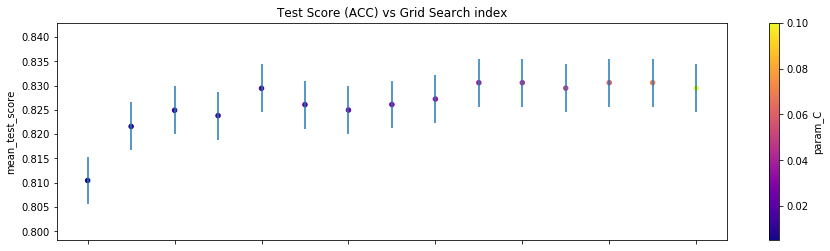

In [276]:
# Show test score with error bars vs the GS original order (index)
# Can color-code points by one of the parameters (or not.)
# Pic a param
this_param = param_keys[0]
df_gscv.plot.scatter('index', 'mean_test_score', yerr='sterr_test_score', figsize=(15,4),
                        title='Test Score ('+scorer_name+') vs Grid Search index',
                        c="param_"+this_param, colormap='plasma')
plt.show()

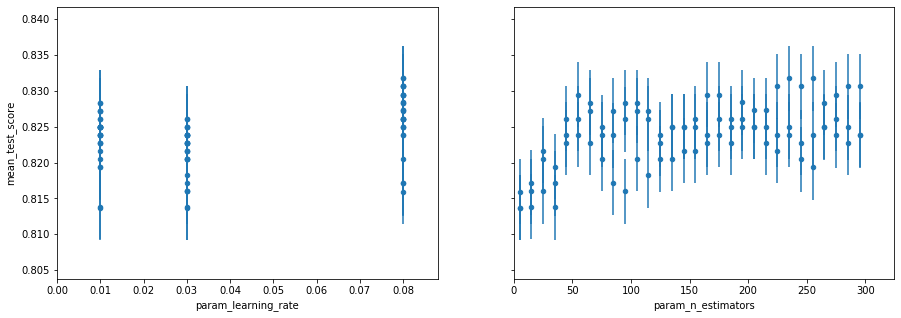

In [210]:
# Make plots of the test values vs param values for the params
num_param_keys = len(param_keys)
fig, axes = plt.subplots(1,num_param_keys,sharey=True,figsize=(15,5))
for iparam, this_param in enumerate(param_keys):
    # Why is this needed to get scatter to work?!?
    df_gscv["param_"+this_param] = df_gscv["param_"+this_param].astype(float)
    if num_param_keys > 1:
        ax = axes[iparam]
    else:
        ax = axes
    # without or with the error bars
    ##df_gscv.plot.scatter("param_"+this_param,'mean_test_score',ax=ax)
    df_gscv.plot.scatter("param_"+this_param,'mean_test_score',ax=ax, yerr='sterr_test_score',
                         # include this to get better scaling for small values...
                         xlim=(0.000,1.1*max(df_gscv["param_"+this_param])))
    
plt.show()

In [277]:
param_keys

['C', 'tol']

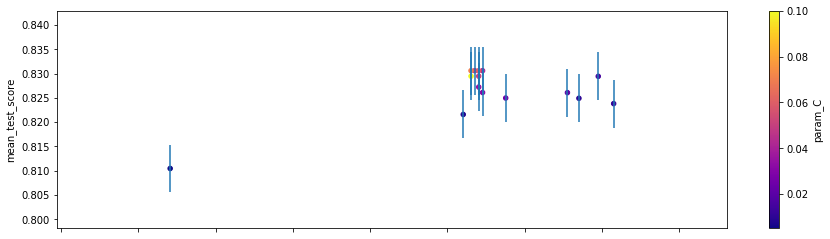

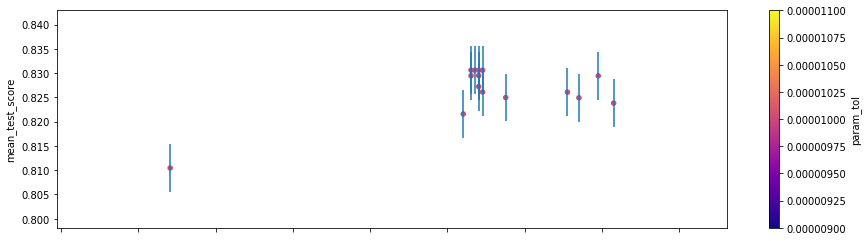

In [278]:
# Show the test score vs train score with color-code by parameter values (if useful)
if True:
    for this_param in param_keys:
        df_gscv.plot.scatter('mean_train_score','mean_test_score',
                         c="param_"+this_param, colormap='plasma',
                         sharex=True, figsize=(15,4), yerr='sterr_test_score')

    plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
###  Done with <a href="#HyperSearch">Hyper-parameters</a> above
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## <a id="FeatureImportance">Feature Importance</a>
Back to <a href="#Index">Index</a>

<Figure size 576x1080 with 0 Axes>

<BarContainer object of 21 artists>

([<matplotlib.axis.YTick at 0x1afc655d7c8>,
 <a list of 21 Text yticklabel objects>)

Text(0.5, 0, 'XGB -- Relative Importance')

Text(0.5, 1.0, '           XGB -- Variable Importance                  max --> 0.260 ')

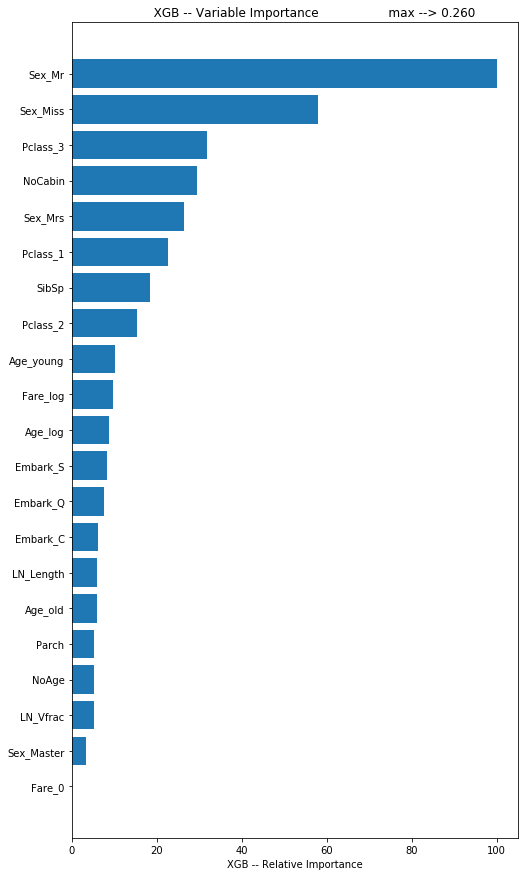

In [212]:
if model_name in ['lgr','dtc','rfc','gbc','mlp','xgb']:
    # Plot feature importance
    # Get feature importance
    if model_name == 'mlp':
        # For mlp regressor create a quasi-importance from the weights.
        # "The ith element in the list represents the weight matrix corresponding to layer i."
        # Input layer weights
        ##len(best_regressor.coefs_[0])
        # sum of abs() of input weights for each feature
        feature_importance = np.array([sum(np.abs(wgts)) for wgts in best_fit_model.coefs_[0] ])
    elif model_name == 'lgr':
        # For Logisitic Regression use the coeff.s to approximate an importance
        coeffs = best_fit_model.coef_[0]
        feature_importance = 0.0 * coeffs
        print(" Feature        Import.      coeff.    max from mean")
        for icol, col in enumerate(X.columns):
            col_mean = X[col].mean()
            col_max_from_mean = np.max(np.abs(X[col] - col_mean))
            feature_importance[icol] = abs(coeffs[icol]/col_max_from_mean)
            print("{:10}: {:10.3f}, {:10.3f}, {:10.2f}".format(col, feature_importance[icol], coeffs[icol], col_max_from_mean))
    else:
        # tree models have feature importance directly available:
        feature_importance = best_fit_model.feature_importances_
        
    # make importances relative to max importance
    max_import = feature_importance.max()
    feature_importance = 100.0 * (feature_importance / max_import)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    plt.figure(figsize=(8, 15))
    ##plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel(model_name.upper()+' -- Relative Importance')
    plt.title('           '+model_name.upper()+
              ' -- Variable Importance                  max --> {:.3f} '.format(max_import))

    plt.savefig(model_name.upper()+"_importance_"+version_str+".png")
    plt.show()
    

## <a id="EvaluateBest">Evaluate Best Model</a>
Back to <a href="#Index">Index</a>

In [279]:
best_fit_model.get_params()

{'C': 0.04,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'sag',
 'tol': 1e-05,
 'verbose': 1,
 'warm_start': False}

In [214]:
# Make the model probability predictions on the Training and Test (Kaggle) data

# Just use the final best-fit model fit on all training data
best_fit_model.fit(X,y)

# Fit the model on all the Training data
print("")
all_train_score = accuracy_score(y, best_fit_model.predict(X))
print("Nominal best-fit All-Train accuracy: {:.2f} %\n".format(100.0*all_train_score))

# The probabilty values, 0 to 1
yh = best_fit_model.predict_proba(X)
yh = yh[:,1]

# Make the Kaggle set predictions too
yh_kag = best_fit_model.predict_proba(Xkag)
yh_kag = yh_kag[:,1]

# Or ...
if USE_SPLIT_AVE:
    # The CV fitting above was done on (k-1)/k of the data,
    # do that to evaluate the final model as well.
    # Use the average of the split-predicted proba values.
    # (Or use median? any/much difference?)
    print("Doing (k-1)/k fits:")
    yh = 0.0 * yh
    yh_kag = 0.0 * yh_kag
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=False)
    for train_index, test_index in skf.split(X, y):
        X_split, X_dummy = X.loc[train_index], X.loc[test_index]
        y_split, y_dummy = y[train_index], y[test_index]
        # fit the model on the (k-1)/k of the data
        best_fit_model.fit(X_split, y_split)
        # FYI, accuracy of this model applied to whole dataset
        print("   split --> {}".format(accuracy_score(y, best_fit_model.predict(X))))
        # accumulate and average the probabilty values:
        yh_split = best_fit_model.predict_proba(X)
        yh += (yh_split[:,1])/cv_folds
        yh_kag_split = best_fit_model.predict_proba(Xkag)
        yh_kag += (yh_kag_split[:,1])/cv_folds


# yh and yh_kag are the model probability predictions.
# Convert to discrete 0,1 using a threshold:
#
yh_threshold = 0.45
#
# Training:
yp = 1.0*(yh > yh_threshold)
# Test (Kaggle):
yp_kag = 1.0*(yh_kag > yh_threshold)


print("")
ave_train_score = accuracy_score(y, yp)
print("Split-Train accuracy: {:.2f} %\n".format(100.0*ave_train_score))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)


Nominal best-fit All-Train accuracy: 89.56 %

Doing (k-1)/k fits:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8866442199775533


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8821548821548821


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8888888888888888


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.877665544332211


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8754208754208754


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8821548821548821


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8787878787878788


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8888888888888888


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8832772166105499


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1.5,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=235, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

   split --> 0.8866442199775533

Split-Train accuracy: 87.65 %



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFC65CB8C8>,
      dtype=object)

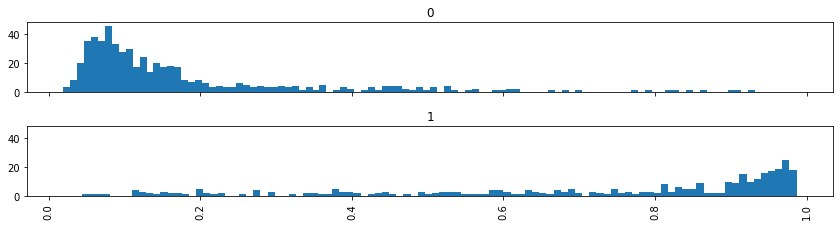

In [215]:
# Show the yh distribution by known Survival

# Temporarily ... Put the model speed and ys in the X dataframe:
X['preds'] = yh
X['Survived'] = y

X.hist('preds', by='Survived', bins=100, sharex=True, sharey=True, layout=(5,1), figsize=(14,9))
plt.show()

# Remove the added columns:
X = X.drop(['Survived','preds'],axis=1)

## <a id="ConfusionDots">Confusion Dots and ROC plots</a>
Back to <a href="#Index">Index</a>

Use the y_yhat_plots() routine to shown how the prediction is doing with a Confusion Dots plot (a visual confusion matrix) and an ROC plot.<br>
This routine was taken from the file chirp_roc_lib.py in the github repo at: 
https://github.com/dan3dewey/chirp-to-ROC <br>
and is included in this notebook at the beginning of the <a href="#MachineLearning">Machine Learning</a> section.

In [284]:
yh_threshold = 0.8


Confusion matrix (y_thresh=0.800):

   Predicted  0.0  1.0
Actual               
0            542    7
1            148  194

Results:

 False Pos =  1.2750455373406193 %
 False Neg =  43.27485380116959 %
    Recall =  56.72514619883041 %
 Precision =  96.51741293532339 %

    Accuracy =  82.60381593714928 %
 Pos. fract. =  38.38383838383838 %


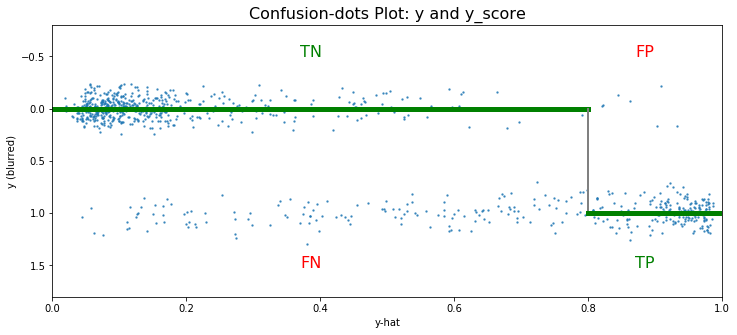

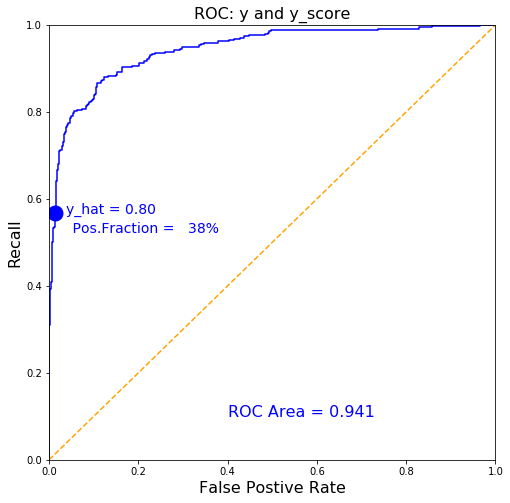

In [285]:
# See how the prediction, yh, compares with the known y values:
roc_area = y_yhat_plots(y, yh, title="y and y_score", y_thresh=yh_threshold,
                       plots_prefix=model_name.upper()+"_"+version_str)

In [217]:
# Look at the errors made

# FP: Predicted Survival but did not survive:
FP_indices = (yh > yh_threshold) & (y < 0.5)
df_FPs = df_train[FP_indices]

# FN: Predicted not to Survive but did survive:
FN_indices = (yh < yh_threshold) & (y > 0.5)
df_FNs = df_train[FN_indices]

print("\n{}: {} FPs and {} FNs\n".format(model_name.upper(),len(df_FPs),len(df_FNs)))


XGB: 44 FPs and 66 FNs



In [218]:
# List FPs: predicted to Survive, but Perished:    mostly females
#
orig_cols = df_FPs.columns
df_FPs[orig_cols[0:12]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,ooo,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,ooo,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,ooo,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,ooo,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,ooo,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,ooo,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,ooo,S


In [219]:
# List FNs: predicted to Perish, but Survived:    mostly males
#
orig_cols = df_FNs.columns
df_FNs[orig_cols[0:12]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,ooo,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,4,347077,31.3875,ooo,S
36,37,1,3,"Mamee, Mr. Hanna",male,27.0,0,0,2677,7.2292,ooo,C
...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,ooo,C
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,ooo,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,ooo,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,33.0,0,0,367228,7.7500,ooo,Q


<Figure size 1080x432 with 0 Axes>

([array([ 2., 13., 70., 83., 76., 57., 48., 41., 39., 17., 19., 10., 11.,
         12., 10.,  8.,  7.,  9.,  9., 11.,  5.,  7., 12.,  7.,  9.,  6.,
         12.,  5.,  3., 10.,  7.,  6.,  5.,  7., 10.,  4.,  3.,  7.,  5.,
          8., 10., 12., 15.,  8., 11., 26., 25., 37., 46., 11.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72,

Text(0.5, 1.0, 'Train: Prediction Values')

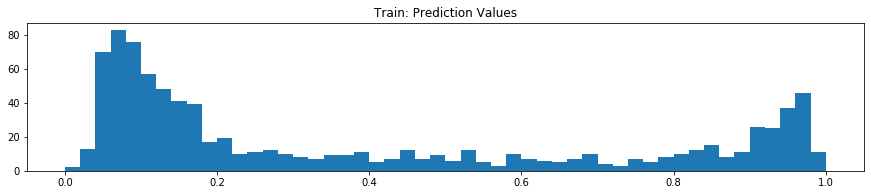

In [220]:
# Histogram of the model's predicted values

fixed_bins = 0.0 + np.array(range(50+1))/(5*10.0)

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.hist([yh]+[-1.0]+[5.0], bins=fixed_bins, histtype='stepfilled')
plt.title("Train: Prediction Values")
plt.show()

In [221]:
# Summarize the fitting results
if len(gscv_stats) > 0:
    print("\n"+model_name.upper()+
              ":  Train = {:.3f}, {} FPs, {} FNs, AUC={:.3f}   GSCV: Test = {:.3f}, Train = {:.3f}\n".format(
            accuracy_score(y, yp), len(df_FPs), len(df_FNs), roc_area,
            gscv_stats.loc['max','mean_test_score'],
            gscv_stats.loc['max','mean_train_score']))
else:
    print("\n"+model_name.upper()+
              ":  Train = {:.3f}, {} FPs, {} FNs, AUC={:.3f}\n".format(
            accuracy_score(y, yp), len(df_FPs), len(df_FNs), roc_area))


# with Sex_M,F:
#   LGR: Train = 0.827, 54 FPs, 100 FNs, AUC=0.866   GSCV:Test = 0.818, Train = 0.825
#   MLP: Train = 0.842, 44 FPs,  97 FNs, AUC=0.885   GSCV:Test = 0.818, Train = 0.837
#   GBC: Train = 0.862, 38 FPs,  85 FNs, AUC=0.908   GSCV:Test = 0.834, Train = 0.860
# with Sex_Mr,etc:
#   LGR: Train = 0.837, 59 FPs, 86 FNs, AUC=0.879   GSCV:Test = 0.828, Train = 0.838
#   SVC: Train = 0.843, 77 FPs, 63 FNs, AUC=0.903   GSCV:Test = 0.819, Train = 0.839
#   MLP: Train = 0.848, 37 FPs, 98 FNs, AUC=0.896   GSCV:Test = 0.830, Train = 0.849
#        Train = 0.846, 38 FPs, 99 FNs, AUC=0.899   GSCV:Test = 0.828, Train = 0.847
#   GBC: Train = 0.862, 42 FPs, 81 FNs, AUC=0.917   GSCV:Test = 0.835, Train = 0.862
#        Train = 0.865, 42 FPs, 78 FNs, AUC=0.918   GSCV:Test = 0.841, Train = 0.865
#        Train = 0.865, 40 FPs, 80 FNs, AUC=0.919   GSCV:Test = 0.844, Train = 0.865
#
# with LN_Length,LN_Vfrac (not LN_Vowels):
#   LGR:  Train = 0.835, 67 FPs, 80 FNs, AUC=0.881   GSCV:Test = 0.832, Train = 0.841
#   SVC:  Train = 0.851, 72 FPs, 61 FNs, AUC=0.920   GSCV:Test = 0.819, Train = 0.851
#   MLP:  Train = 0.860, 37 FPs, 88 FNs, AUC=0.901   GSCV:Test = 0.837, Train = 0.855
#   MLP:  Train = 0.852, 33 FPs, 99 FNs, AUC=0.904   GSCV:Test = 0.836, Train = 0.855
#   GBC:  Train = 0.870, 39 FPs, 77 FNs, AUC=0.926   GSCV:Test = 0.834, Train = 0.864
#   GBC:  Train = 0.870, 39 FPs, 77 FNs, AUC=0.926   GSCV:Test = 0.836, Train = 0.866
#   GBC:  Train = 0.860, 43 FPs, 82 FNs, AUC=0.923   GSCV:Test = 0.840, Train = 0.867

# but no Fare_log:
#   GBC:  Train = 0.861, 35 FPs, 89 FNs, AUC=0.915   GSCV:Test = 0.827, Train = 0.860

# Using XGB
# (v32)  XGB:  Train = 0.909, 34 FPs, 47 FNs, AUC=0.958   GSCV: Test = 0.844, Train = 0.966
# (v34)  XGB:  Train = 0.866, 46 FPs, 73 FNs, AUC=0.921   GSCV: Test = 0.828, Train = 0.872  


XGB:  Train = 0.877, 44 FPs, 66 FNs, AUC=0.942   GSCV: Test = 0.832, Train = 0.892



## <a id="OutputKaggle">Output Kaggle Predictions</a>
Back to <a href="#Index">Index</a>

In [222]:
# yh_kag, yp_kag were calculated above when yh,yp were evaluated.

<Figure size 1080x432 with 0 Axes>

([array([ 0.,  9., 21., 33., 32., 30., 23., 21., 17.,  6.,  7.,  8.,  8.,
          3.,  3.,  8.,  1.,  7.,  3.,  3.,  3.,  4.,  5.,  3.,  8.,  6.,
          9.,  3.,  3.,  7.,  4.,  3.,  2.,  0.,  2.,  8.,  5.,  3.,  3.,
          7.,  1.,  4.,  7.,  1.,  9., 10., 16., 19., 13.,  7.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72,

Text(0.5, 1.0, 'Kaggle: Prediction Values')

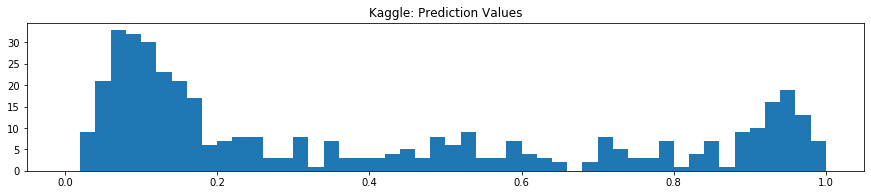

In [223]:
# Kaggle prediction probs
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.hist([yh_kag]+[-1.0]+[5.0], bins=fixed_bins, histtype='stepfilled')
plt.title("Kaggle: Prediction Values")
plt.show()

In [224]:
# Put the 0,1 predictions into the original df_test which is the Kaggle test data
df_test['Survived'] = yp_kag.astype(int)

In [225]:
# Any -1 s remaining for answers?
all_answered = (df_test.Survived.min() >= 0)
print("All predictions made?  {}".format(all_answered))

All predictions made?  True


In [226]:
# Save the result as the submission
df_test[['PassengerId','Survived']].to_csv("submission.csv",index=False)

In [227]:
# that's all.
!head -10 submission.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [228]:
!tail -10 submission.csv

'tail'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## <a id="TheEnd">The End</a>
Back to <a href="#Index">Index</a>